# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import missingno as msno

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from xgboost import XGBClassifier,plot_importance
from sklearn.utils import class_weight

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.constraints import Constraint

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import roc_curve, auc

# -------------------------------------------------------------------------------------------------------

# Loading datasets TESS and PHL

### TESS = Transiting Exoplanet Survey Satellite; PHL = Planetary Habitability Laboratory

In [2]:
tess = pd.read_csv("tess.csv")
phl = pd.read_csv("phl.csv")

### Storing in Dataframe

In [3]:
tess = pd.DataFrame(tess)
phl = pd.DataFrame(phl)

### Shape of TESS and PHL (rows,cloumns)

In [4]:
tess.shape

(446, 92)

In [5]:
phl.shape

(5220, 103)

### Table head data for TESS and PHL

In [6]:
tess.head()

pl_name  hostname  default_flag  sy_snum  sy_pnum discoverymethod  \
0    AU Mic b    AU Mic             1        1        3         Transit   
1    AU Mic c    AU Mic             1        1        3         Transit   
2  DS Tuc A b  DS Tuc A             1        2        1         Transit   
3   GJ 1252 b   GJ 1252             1        1        1         Transit   
4    GJ 143 b    GJ 143             1        1        2         Transit   

   disc_year                                 disc_facility  \
0       2020  Transiting Exoplanet Survey Satellite (TESS)   
1       2021  Transiting Exoplanet Survey Satellite (TESS)   
2       2019  Transiting Exoplanet Survey Satellite (TESS)   
3       2020  Transiting Exoplanet Survey Satellite (TESS)   
4       2019  Transiting Exoplanet Survey Satellite (TESS)   

               soltype  pl_controv_flag  ... sy_vmagerr2  sy_kmag  \
0  Published Confirmed                0  ...       -0.10    4.529   
1  Published Confirmed                0  ...       -0.10    4.529   
2  Published Confirmed                0  ...       -0.03    6.676   
3  Published Confirmed                0  ...       -0.20    7.915   
4  Published Confirmed                0  ...       -0.03    5.375   

   sy_kmagerr1  sy_kmagerr2  sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2  \
0        0.020       -0.020     7.84038        0.000731       -0.000731   
1        0.020       -0.020     7.84038        0.000731       -0.000731   
2        0.034       -0.034     8.31926        0.001025       -0.001025   
3        0.023       -0.023    11.23640        0.000806       -0.000806   
4        0.024       -0.024     7.67906        0.000260       -0.000260   

    rowupdate  pl_pubdate  releasedate  
0  09-05-2022     2021-12   09-05-2022  
1  09-05-2022     2021-12   09-05-2022  
2  03-07-2019     2019-07   11-07-2019  
3  10-07-2023     2022-09   10-07-2023  
4  22-04-2019     2019-04   25-04-2019  

[5 rows x 92 columns]

In [7]:
phl.head()

P_NAME      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  P_RADIUS  \
0    11 Com b  6165.86330        -476.74200         476.74200   12.1068   
1    11 UMi b  4684.78480        -794.57001         794.57001   12.2189   
2    14 And b  1525.57440               NaN               NaN   12.8915   
3    14 Her b  2586.74170        -308.97014         492.67154   12.5552   
4  16 Cyg B b   565.73385         -25.42624          25.42624   13.4520   

   P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR P_UPDATED    P_PERIOD  ...  \
0                 NaN                 NaN  2007.0   2008-01   326.03000  ...   
1                 NaN                 NaN  2009.0   2009-10   516.21997  ...   
2                 NaN                 NaN  2008.0   2008-12   185.84000  ...   
3                 NaN                 NaN  2002.0   2003-01  1765.03890  ...   
4                 NaN                 NaN  1996.0   1997-07   798.50000  ...   

   S_ABIO_ZONE  S_TIDAL_LOCK  P_HABZONE_OPT  P_HABZONE_CON  P_TYPE_TEMP  \
0     0.476460      0.642400              0              0          Hot   
1     0.193891      0.541702              0              0          Hot   
2     0.502752      0.597816              0              0          Hot   
3     0.923150      0.434927              0              0         Cold   
4     1.983658      0.512355              1              1         Warm   

   P_HABITABLE     P_ESI  S_CONSTELLATION  S_CONSTELLATION_ABR  \
0            0  0.083004   Coma Berenices                  Com   
1            0  0.081792       Ursa Minor                  UMi   
2            0  0.081758        Andromeda                  And   
3            0  0.163310         Hercules                  Her   
4            0  0.368405           Cygnus                  Cyg   

   S_CONSTELLATION_ENG  
0      Berenice's Hair  
1          Little Bear  
2            Andromeda  
3             Hercules  
4                 Swan  

[5 rows x 103 columns]

### Summary of TESS and PHL dataset

In [8]:
print(tess.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          446 non-null    object 
 1   hostname         446 non-null    object 
 2   default_flag     446 non-null    int64  
 3   sy_snum          446 non-null    int64  
 4   sy_pnum          446 non-null    int64  
 5   discoverymethod  446 non-null    object 
 6   disc_year        446 non-null    int64  
 7   disc_facility    446 non-null    object 
 8   soltype          446 non-null    object 
 9   pl_controv_flag  446 non-null    int64  
 10  pl_refname       446 non-null    object 
 11  pl_orbper        446 non-null    float64
 12  pl_orbpererr1    439 non-null    float64
 13  pl_orbpererr2    439 non-null    float64
 14  pl_orbperlim     446 non-null    int64  
 15  pl_orbsmax       396 non-null    float64
 16  pl_orbsmaxerr1   395 non-null    float64
 17  pl_orbsmaxerr2  

In [9]:
print(phl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Columns: 103 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(86), int64(3), object(14)
memory usage: 4.1+ MB
None


### Check Missing or NUll values in TESS and PHL

In [10]:
pd.set_option('display.max_columns', None)
null_tess = tess.isnull().sum()
null_tess = null_tess[null_tess>0]
print(null_tess)

pl_orbpererr1      7
pl_orbpererr2      7
pl_orbsmax        50
pl_orbsmaxerr1    51
pl_orbsmaxerr2    51
                  ..
sy_vmag            1
sy_vmagerr1        1
sy_vmagerr2        1
sy_kmagerr1        2
sy_kmagerr2        2
Length: 63, dtype: int64


In [11]:
null_tess_count=null_tess.sum()
print("Total Null elements in TESS:", null_tess_count)

Total Null elements in TESS: 3908


In [12]:
pd.set_option('display.max_columns', None)
null_phl = phl.isnull().sum()
null_phl = null_phl[null_phl>0]
print(null_phl)

P_NAME                 1
P_MASS               135
P_MASS_ERROR_MIN    3002
P_MASS_ERROR_MAX    3002
P_RADIUS              18
                    ... 
S_SNOW_LINE          167
S_ABIO_ZONE          157
S_TIDAL_LOCK           4
P_TYPE_TEMP          168
P_ESI                168
Length: 91, dtype: int64


In [13]:
null_phl_count=null_phl.sum()
print("Total Null elements in PHL:", null_phl_count)

Total Null elements in PHL: 86348


### Visualizing missing data distribution in TESS and PHL

<Axes: >

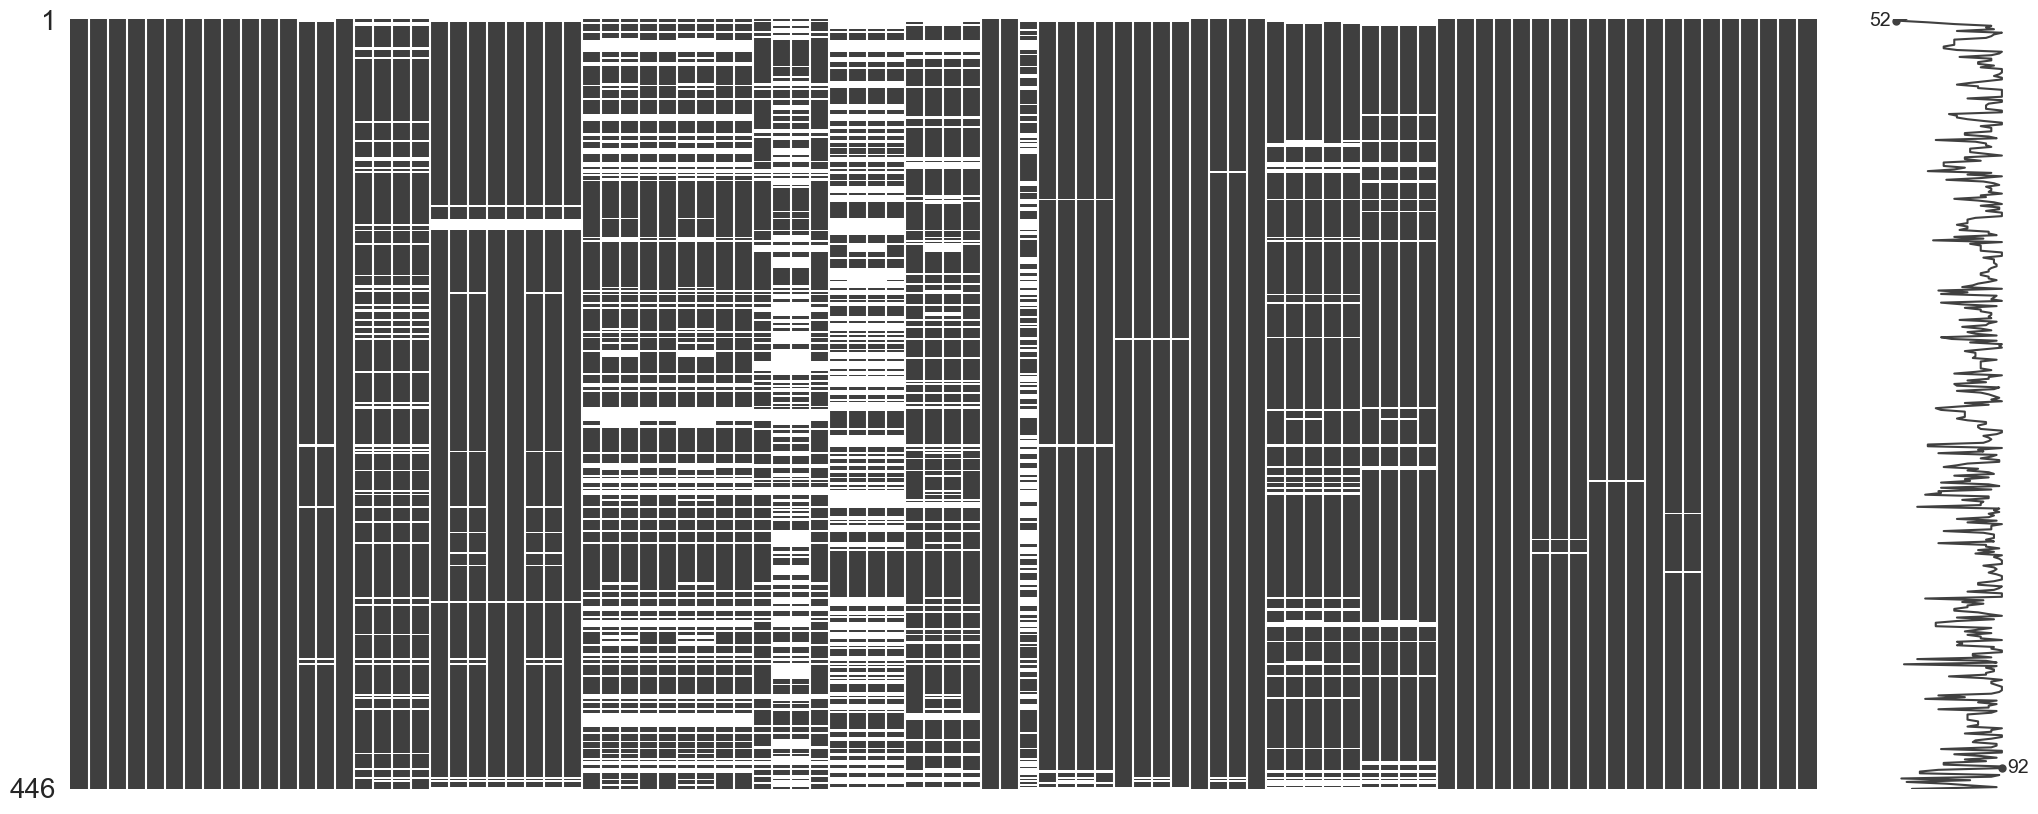

In [14]:
msno.matrix(tess)

<Axes: >

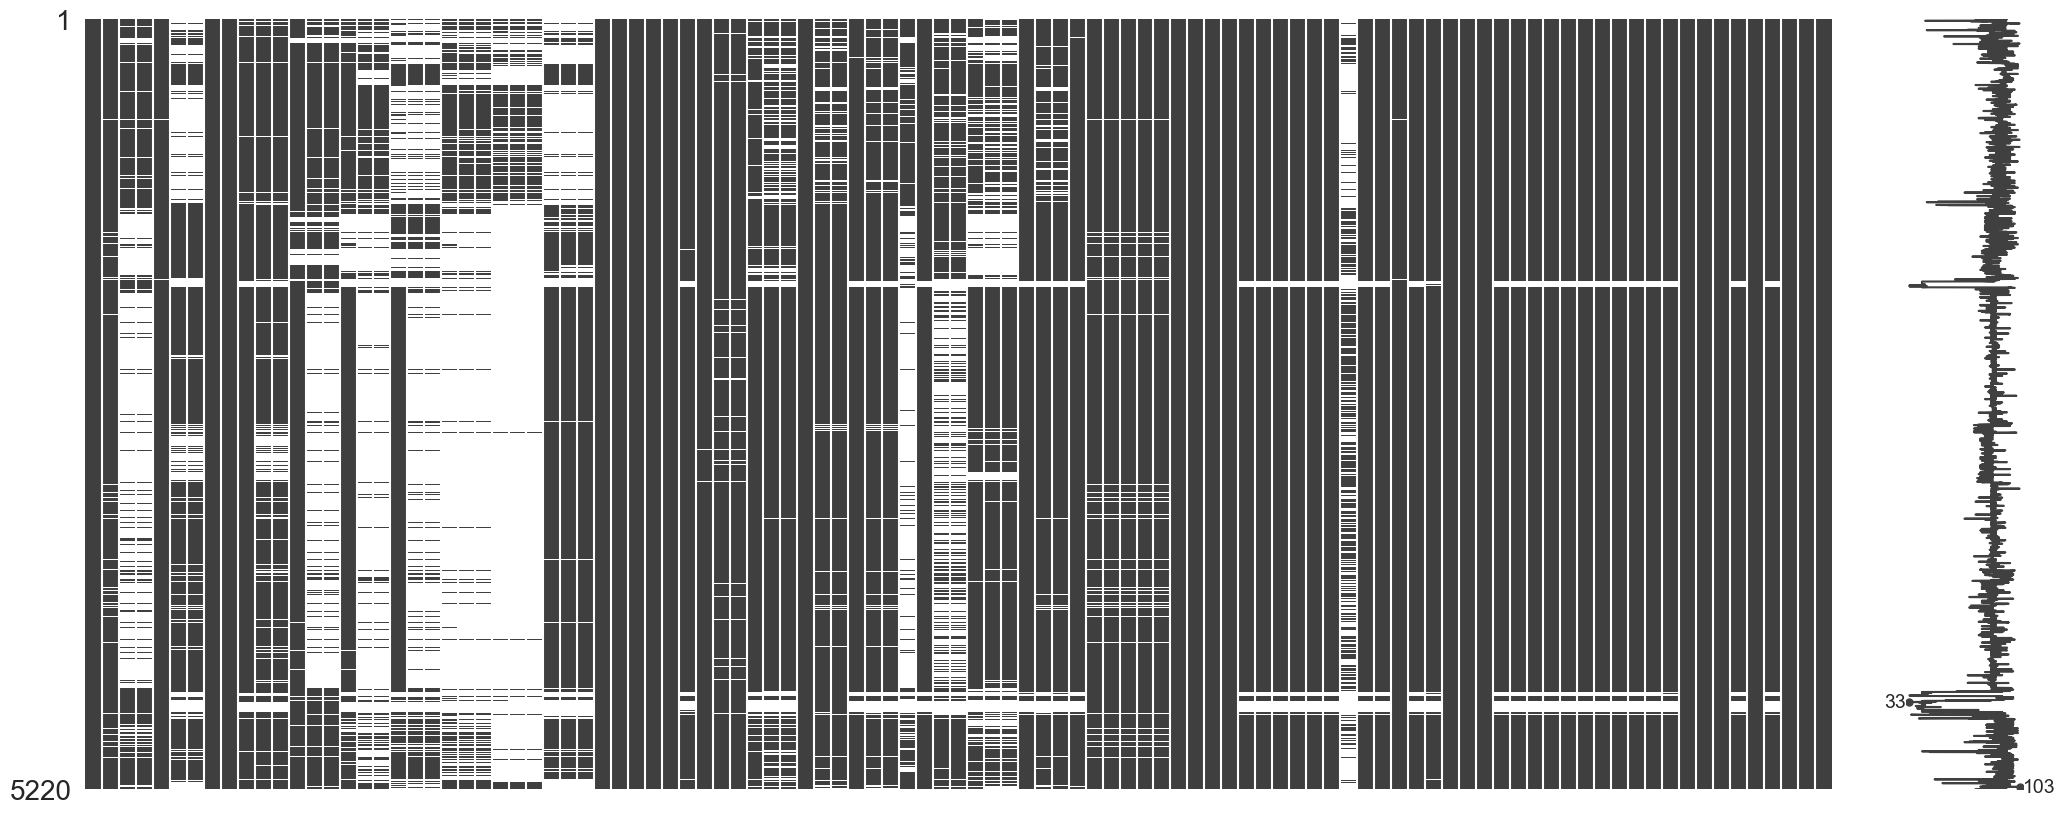

In [15]:
msno.matrix(phl)

# -------------------------------------------------------------------------------------------------------

# Merging TESS and PHL datasets

## Preparing TESS for merging

### Renaming necessary TESS columns

In [16]:
column_map = {
    'pl_name': 'P_NAME',
    'hostname': 'S_NAME',
    'pl_orbper': 'P_PERIOD',
    'pl_rade': 'P_RADIUS',
    'pl_bmasse': 'P_MASS',
    'pl_orbeccen': 'P_ECCENTRICITY',
    'st_teff': 'S_TEMPERATURE',
    'st_rad': 'S_RADIUS',
    'st_mass': 'S_MASS',
    'st_met': 'S_METALLICITY',
    'sy_dist': 'S_DISTANCE',
    'dec': 'S_DEC'
}

In [17]:
extra_col = [
    'P_ESI', 'P_TYPE_TEMP', 'P_TEMP_SURF_MAX', 'P_HABITABLE'
]

In [18]:
tess_renamed = tess.rename(columns=column_map)

In [19]:
tess_renamed.head()

P_NAME    S_NAME  default_flag  sy_snum  sy_pnum discoverymethod  \
0    AU Mic b    AU Mic             1        1        3         Transit   
1    AU Mic c    AU Mic             1        1        3         Transit   
2  DS Tuc A b  DS Tuc A             1        2        1         Transit   
3   GJ 1252 b   GJ 1252             1        1        1         Transit   
4    GJ 143 b    GJ 143             1        1        2         Transit   

   disc_year                                 disc_facility  \
0       2020  Transiting Exoplanet Survey Satellite (TESS)   
1       2021  Transiting Exoplanet Survey Satellite (TESS)   
2       2019  Transiting Exoplanet Survey Satellite (TESS)   
3       2020  Transiting Exoplanet Survey Satellite (TESS)   
4       2019  Transiting Exoplanet Survey Satellite (TESS)   

               soltype  pl_controv_flag  \
0  Published Confirmed                0   
1  Published Confirmed                0   
2  Published Confirmed                0   
3  Published Confirmed                0   
4  Published Confirmed                0   

                                          pl_refname   P_PERIOD  \
0  <a refstr=CALE_ET_AL__2021 href=https://ui.ads...   8.462999   
1  <a refstr=CALE_ET_AL__2021 href=https://ui.ads...  18.858991   
2  <a refstr=NEWTON_ET_AL__2019 href=https://ui.a...   8.138268   
3  <a refstr=LUQUE__AMP__PALL_EACUTE__2022 href=h...   0.518233   
4  <a refstr=DRAGOMIR_ET_AL__2019 href=https://ui...  35.612530   

   pl_orbpererr1  pl_orbpererr2  pl_orbperlim  pl_orbsmax  pl_orbsmaxerr1  \
0            NaN            NaN             0      0.0645          0.0013   
1            NaN            NaN             0      0.1101          0.0020   
2       0.000011      -0.000011             0         NaN             NaN   
3       0.000008      -0.000008             0         NaN             NaN   
4       0.000600      -0.000620             0      0.1915          0.0058   

   pl_orbsmaxerr2  pl_orbsmaxlim  P_RADIUS  pl_radeerr1  pl_radeerr2  \
0         -0.0013            0.0       NaN          NaN          NaN   
1         -0.0020            0.0       NaN          NaN          NaN   
2             NaN            NaN     5.700        0.170       -0.170   
3             NaN            NaN     1.193        0.074       -0.074   
4         -0.0063            0.0     2.610        0.170       -0.160   

   pl_radelim  pl_radj  pl_radjerr1  pl_radjerr2  pl_radjlim  P_MASS  \
0         NaN      NaN          NaN          NaN         NaN   20.12   
1         NaN      NaN          NaN          NaN         NaN    9.60   
2         0.0    0.509        0.015       -0.015         0.0     NaN   
3         0.0    0.106        0.007       -0.007         0.0    1.32   
4         0.0    0.233        0.015       -0.014         0.0   22.70   

   pl_bmasseerr1  pl_bmasseerr2  pl_bmasselim  pl_bmassj  pl_bmassjerr1  \
0           1.57          -1.72           0.0    0.06330        0.00494   
1           2.07          -2.31           0.0    0.03020        0.00651   
2            NaN            NaN           NaN        NaN            NaN   
3           0.28          -0.28           0.0    0.00415        0.00088   
4           2.20          -1.90           0.0    0.07142        0.00692   

   pl_bmassjerr2  pl_bmassjlim pl_bmassprov  P_ECCENTRICITY  pl_orbeccenerr1  \
0       -0.00541           0.0         Mass           0.186            0.036   
1       -0.00727           0.0         Mass             NaN              NaN   
2            NaN           NaN          NaN           0.000              NaN   
3       -0.00088           0.0         Mass           0.000              NaN   
4       -0.00598           0.0         Mass           0.188            0.076   

   pl_orbeccenerr2  pl_orbeccenlim  pl_insol  pl_insolerr1  pl_insolerr2  \
0           -0.035             0.0       NaN           NaN           NaN   
1              NaN             NaN       NaN           NaN           NaN   
2              NaN             0

In [20]:
tess_renamed.shape

(446, 92)

## Preparing PHL for merging

In [21]:
common_col = list(column_map.values())
common_col

['P_NAME',
 'S_NAME',
 'P_PERIOD',
 'P_RADIUS',
 'P_MASS',
 'P_ECCENTRICITY',
 'S_TEMPERATURE',
 'S_RADIUS',
 'S_MASS',
 'S_METALLICITY',
 'S_DISTANCE',
 'S_DEC']

In [22]:
common_col = [
    'P_NAME',
    'S_NAME',
    'P_PERIOD',
    'P_RADIUS',
    'P_MASS',
    'P_ECCENTRICITY',
    'S_TEMPERATURE',
    'S_RADIUS',
    'S_MASS',
    'S_METALLICITY',
    'S_DISTANCE',
    'S_DEC'
]

phl_only_col = [
    'P_ESI',
    'P_TYPE_TEMP',
    'P_TEMP_SURF_MAX',
    'P_HABITABLE'
]

In [23]:
phl_filtered = phl[common_col + extra_col]

In [24]:
phl_filtered.head()

P_NAME    S_NAME    P_PERIOD  P_RADIUS      P_MASS  P_ECCENTRICITY  \
0    11 Com b    11 Com   326.03000   12.1068  6165.86330        0.231000   
1    11 UMi b    11 UMi   516.21997   12.2189  4684.78480        0.080000   
2    14 And b    14 And   185.84000   12.8915  1525.57440        0.000000   
3    14 Her b    14 Her  1765.03890   12.5552  2586.74170        0.372689   
4  16 Cyg B b  16 Cyg B   798.50000   13.4520   565.73385        0.680000   

   S_TEMPERATURE  S_RADIUS  S_MASS  S_METALLICITY  S_DISTANCE      S_DEC  \
0         4742.0     19.00    2.70         -0.350     93.1846  17.793252   
1         4213.0     29.79    2.78         -0.020    125.3210  71.823943   
2         4813.0     11.00    2.20         -0.240     75.4392  39.235837   
3         5338.0      0.93    0.91          0.405     17.9323  43.816362   
4         5750.0      1.13    1.08          0.060     21.1397  50.516824   

      P_ESI P_TYPE_TEMP  P_TEMP_SURF_MAX  P_HABITABLE  
0  0.083004         Hot       1050.66120            0  
1  0.081792         Hot        982.27048            0  
2  0.081758         Hot        871.32801            0  
3  0.163310        Cold        199.75558            0  
4  0.368405        Warm        417.43772            0

In [25]:
phl_filtered.shape

(5220, 16)

### Saving updated files in system

In [31]:
tess_renamed.to_csv("tess_updated.csv")
phl_filtered.to_csv("phl_updated.csv")

### Loading files from system

In [26]:
tess_updated_df = pd.read_csv('tess_updated.csv')
phl_updated_df = pd.read_csv('phl_updated.csv')

### Selecting common and specific columns in TESS and PHL

In [27]:
phl_selected_adjusted = phl_updated_df[common_col + phl_only_col]
tess_selected_adjusted = tess_updated_df[common_col]

In [28]:
phl_selected_adjusted

P_NAME    S_NAME     P_PERIOD  P_RADIUS      P_MASS  P_ECCENTRICITY  \
0       11 Com b    11 Com   326.030000   12.1068  6165.86330        0.231000   
1       11 UMi b    11 UMi   516.219970   12.2189  4684.78480        0.080000   
2       14 And b    14 And   185.840000   12.8915  1525.57440        0.000000   
3       14 Her b    14 Her  1765.038900   12.5552  2586.74170        0.372689   
4     16 Cyg B b  16 Cyg B   798.500000   13.4520   565.73385        0.680000   
...          ...       ...          ...       ...         ...             ...   
5215   ups And b   ups And     4.617033   14.0125   218.53853        0.021500   
5216   ups And c   ups And   241.258000   12.3310  4443.23550        0.259600   
5217   ups And d   ups And  1276.460000   12.4431  3257.73700        0.298700   
5218   ups Leo b   ups Leo   385.200000   14.2367   162.09228        0.320000   
5219         NaN       NaN   136.750000   13.2278   889.91841        0.000000   

      S_TEMPERATURE  S_RADIUS  S_MASS  S_METALLICITY  S_DISTANCE      S_DEC  \
0           4742.00     19.00    2.70         -0.350     93.1846  17.793252   
1           4213.00     29.79    2.78         -0.020    125.3210  71.823943   
2           4813.00     11.00    2.20         -0.240     75.4392  39.235837   
3           5338.00      0.93    0.91          0.405     17.9323  43.816362   
4           5750.00      1.13    1.08          0.060     21.1397  50.516824   
...             ...       ...     ...            ...         ...        ...   
5215        6156.77      1.56    1.30          0.101     13.4054  41.403815   
5216        6156.77      1.56    1.30          0.101     13.4054  41.403815   
5217        6156.77      1.56    1.30          0.101     13.4054  41.403815   
5218        4836.00     11.22    1.48         -0.200     52.5973  -0.823564   
5219        4780.00     12.00    2.20         -0.205     56.1858   8.461105   

         P_ESI P_TYPE_TEMP  P_TEMP_SURF_MAX  P_HABITABLE  
0     0.083004         Hot       1050.66120            0  
1     0.081792         Hot        982.27048            0  
2     0.081758         Hot        871.32801            0  
3     0.163310        Cold        199.75558            0  
4     0.368405        Warm        417.43772            0  
...        ...         ...              ...          ...  
5215  0.065354         Hot       1616.95810            0  
5216  0.234670         Hot        497.20058            0  
5217  0.365111        Warm        293.18888            0  
5218  0.084996         Hot        905.26402            0  
5219  0.074749         Hot       1005.69490            0  

[5220 rows x 16 columns]

In [29]:
tess_selected_adjusted

P_NAME       S_NAME   P_PERIOD  P_RADIUS      P_MASS  \
0         AU Mic b       AU Mic   8.462999       NaN    20.12000   
1         AU Mic c       AU Mic  18.858991       NaN     9.60000   
2       DS Tuc A b     DS Tuc A   8.138268     5.700         NaN   
3        GJ 1252 b      GJ 1252   0.518233     1.193     1.32000   
4         GJ 143 b       GJ 143  35.612530     2.610    22.70000   
..             ...          ...        ...       ...         ...   
441      WASP-18 c      WASP-18   2.155800       NaN    55.20000   
442      WASP-84 c      WASP-84   1.446885     1.950    15.20000   
443  WD 1856+534 b  WD 1856+534   1.407941    10.400  4386.05400   
444     Wolf 327 b     Wolf 327   0.573474     1.240     2.53000   
445       pi Men c     HD 39091   6.267910       NaN     3.49611   

     P_ECCENTRICITY  S_TEMPERATURE  S_RADIUS  S_MASS  S_METALLICITY  \
0             0.186            NaN       NaN    0.50            NaN   
1               NaN            NaN       NaN    0.50            NaN   
2             0.000         5428.0      0.96    1.01          0.000   
3             0.000         3458.0      0.39    0.38          0.100   
4             0.188         4640.0      0.69    0.73          0.003   
..              ...            ...       ...     ...            ...   
441           0.015         6400.0      1.23    1.22            NaN   
442             NaN            NaN      0.77    0.85            NaN   
443           0.000         4710.0      0.01    0.52            NaN   
444           0.000         3542.0      0.41    0.41         -0.170   
445           0.077            NaN       NaN    1.10            NaN   

     S_DISTANCE      S_DEC  
0        9.7221 -31.342450  
1        9.7221 -31.342450  
2       44.0622 -69.196043  
3       20.3730 -56.462286  
4       16.3200 -63.500166  
..          ...        ...  
441    123.4830 -45.677794  
442    100.5880   1.859893  
443     24.7359  53.509024  
444     28.5321  35.570548  
445     18.2702 -80.464604  

[446 rows x 12 columns]

## Merging two updated TESS and PHL tables

In [30]:
merged_df = pd.merge(phl_selected_adjusted, tess_selected_adjusted, on='P_NAME', how='outer', suffixes=('_phl', '_tess'))


for column in common_col:
    if f"{column}_phl" in merged_df.columns and f"{column}_tess" in merged_df.columns:
        merged_df[column] = merged_df[f"{column}_phl"].combine_first(merged_df[f"{column}_tess"])


col_drop = [f"{col}_phl" for col in common_col] + [f"{col}_tess" for col in common_col]
merged_df = merged_df.drop(columns=col_drop, errors='ignore')


pname_count = merged_df['P_NAME'].nunique()
print("Total number of rows in the merged table",pname_count)

Total number of rows in the merged table 5391


### New merged dataframe

In [208]:
merged_df

P_NAME     P_ESI P_TYPE_TEMP  P_TEMP_SURF_MAX  P_HABITABLE  \
0       11 Com b  0.083004         Hot       1050.66120          0.0   
1       11 UMi b  0.081792         Hot        982.27048          0.0   
2       14 And b  0.081758         Hot        871.32801          0.0   
3       14 Her b  0.163310        Cold        199.75558          0.0   
4     16 Cyg B b  0.368405        Warm        417.43772          0.0   
...          ...       ...         ...              ...          ...   
5387   TOI-904 c       NaN         NaN              NaN          NaN   
5388   TOI-908 b       NaN         NaN              NaN          NaN   
5389   TOI-913 b       NaN         NaN              NaN          NaN   
5390   WASP-84 c       NaN         NaN              NaN          NaN   
5391  Wolf 327 b       NaN         NaN              NaN          NaN   

        S_NAME     P_PERIOD  P_RADIUS      P_MASS  P_ECCENTRICITY  \
0       11 Com   326.030000   12.1068  6165.86330        0.231000   
1       11 UMi   516.219970   12.2189  4684.78480        0.080000   
2       14 And   185.840000   12.8915  1525.57440        0.000000   
3       14 Her  1765.038900   12.5552  2586.74170        0.372689   
4     16 Cyg B   798.500000   13.4520   565.73385        0.680000   
...        ...          ...       ...         ...             ...   
5387   TOI-904    83.999700    2.1670         NaN             NaN   
5388   TOI-908     3.183792    3.1860    16.13700        0.132000   
5389   TOI-913    11.098644    2.4530         NaN             NaN   
5390   WASP-84     1.446885    1.9500    15.20000             NaN   
5391  Wolf 327     0.573474    1.2400     2.53000        0.000000   

      S_TEMPERATURE  S_RADIUS  S_MASS  S_METALLICITY  S_DISTANCE      S_DEC  
0            4742.0     19.00    2.70         -0.350     93.1846  17.793252  
1            4213.0     29.79    2.78         -0.020    125.3210  71.823943  
2            4813.0     11.00    2.20         -0.240     75.4392  39.235837  
3            5338.0      0.93    0.91          0.405     17.9323  43.816362  
4            5750.0      1.13    1.08          0.060     21.1397  50.516824  
...             ...       ...     ...            ...         ...        ...  
5387         3770.2      0.53    0.56          0.022     46.0891 -83.129726  
5388         5626.0      1.03    0.95          0.080    175.7480 -81.250745  
5389         4969.0      0.73    0.82         -0.133     65.1769 -80.803427  
5390            NaN      0.77    0.85            NaN    100.5880   1.859893  
5391         3542.0      0.41    0.41         -0.170     28.5321  35.570548  

[5392 rows x 16 columns]

### Summary of merged_df table

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_NAME           5391 non-null   object 
 1   P_ESI            5052 non-null   float64
 2   P_TYPE_TEMP      5052 non-null   object 
 3   P_TEMP_SURF_MAX  5052 non-null   float64
 4   P_HABITABLE      5220 non-null   float64
 5   S_NAME           5391 non-null   object 
 6   P_PERIOD         5208 non-null   float64
 7   P_RADIUS         5368 non-null   float64
 8   P_MASS           5225 non-null   float64
 9   P_ECCENTRICITY   4681 non-null   float64
 10  S_TEMPERATURE    5238 non-null   float64
 11  S_RADIUS         5217 non-null   float64
 12  S_MASS           5388 non-null   float64
 13  S_METALLICITY    5028 non-null   float64
 14  S_DISTANCE       5374 non-null   float64
 15  S_DEC            5392 non-null   float64
dtypes: float64(13), object(3)
memory usage: 674.1+ KB


### Null cheking of merge_df table

In [33]:
merged_df.isnull().sum()

P_NAME               1
P_ESI              340
P_TYPE_TEMP        340
P_TEMP_SURF_MAX    340
P_HABITABLE        172
S_NAME               1
P_PERIOD           184
P_RADIUS            24
P_MASS             167
P_ECCENTRICITY     711
S_TEMPERATURE      154
S_RADIUS           175
S_MASS               4
S_METALLICITY      364
S_DISTANCE          18
S_DEC                0
dtype: int64

### Visualizing missing data distribution in merged_df

<Axes: >

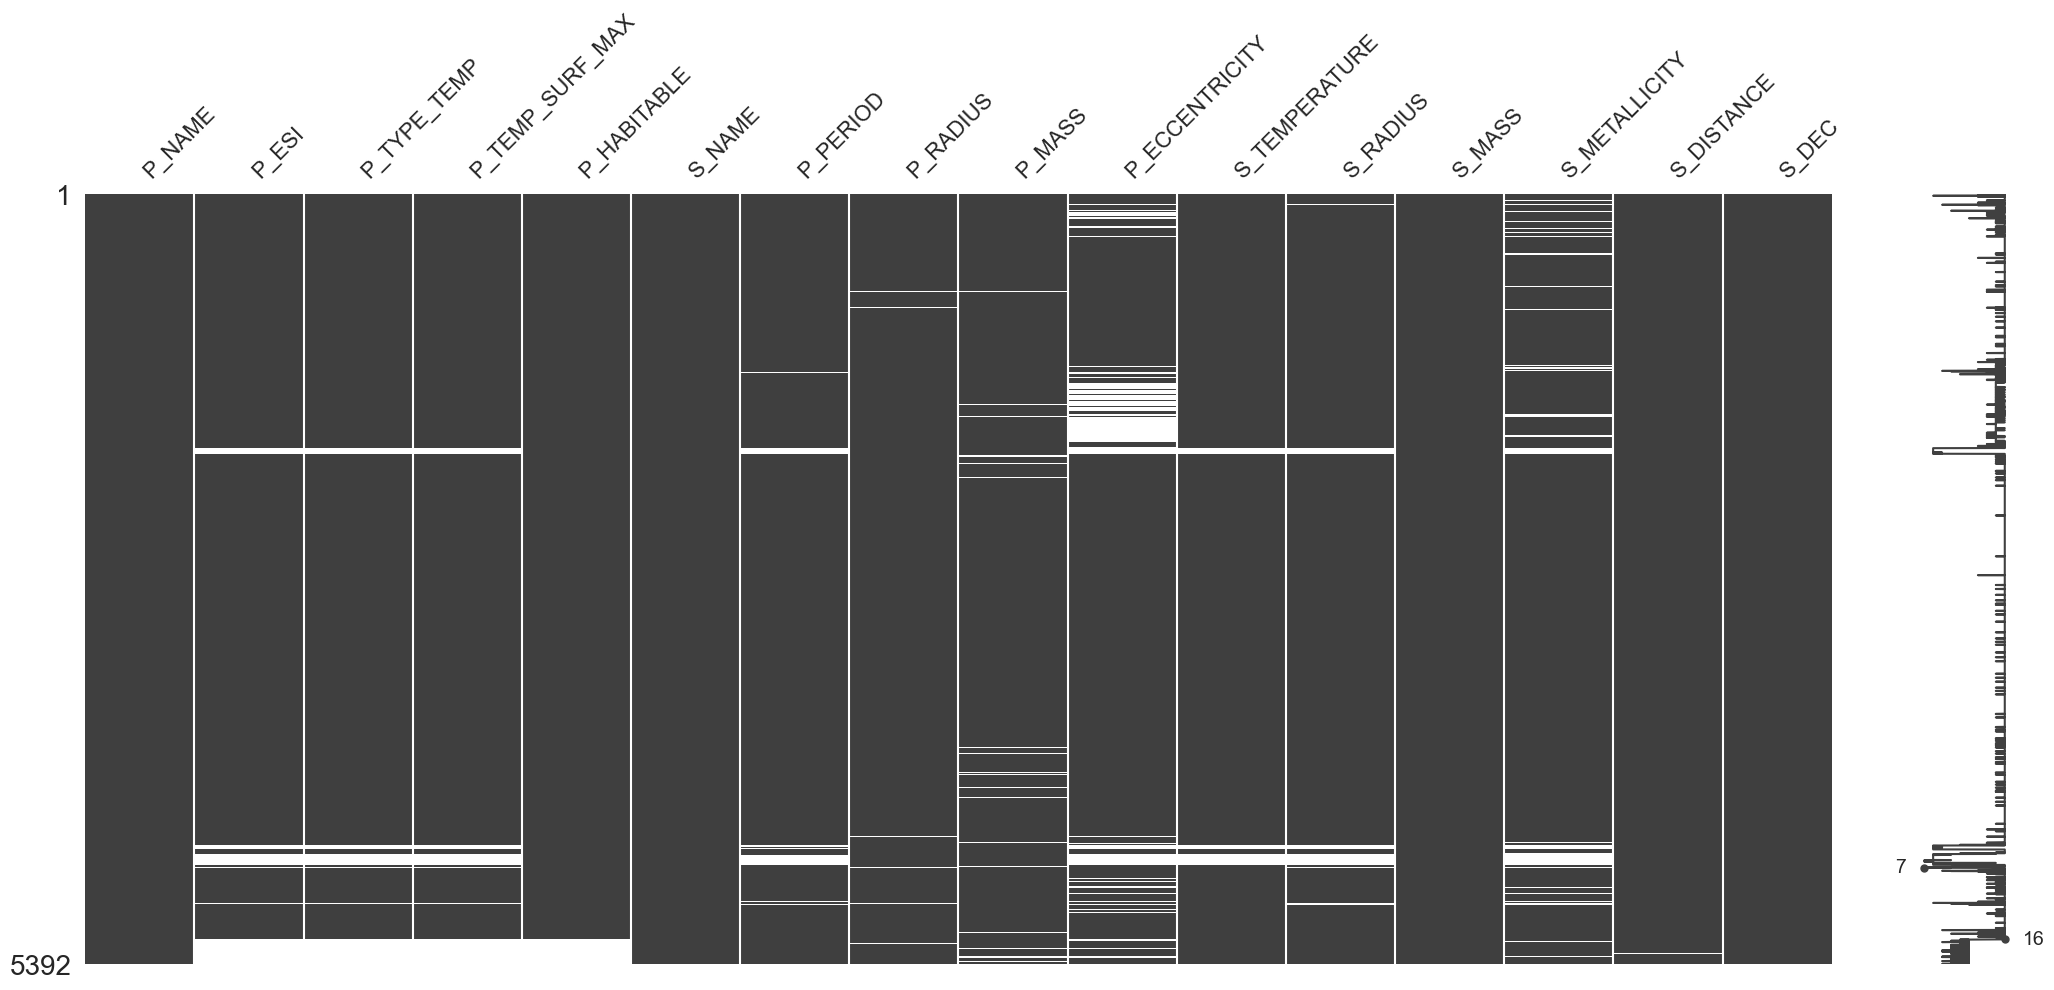

In [34]:
msno.matrix(merged_df)

In [35]:
merged_df.describe()

P_ESI  P_TEMP_SURF_MAX  P_HABITABLE      P_PERIOD     P_RADIUS  \
count  5052.000000      5052.000000  5220.000000  5.208000e+03  5368.000000   
mean      0.256721       929.105848     0.019157  8.097713e+04     5.656611   
std       0.129992       559.707649     0.183682  5.572489e+06     5.315607   
min       0.000001         1.225368     0.000000  9.070629e-02     0.291460   
25%       0.189819       541.514488     0.000000  4.426148e+00     1.771180   
50%       0.268255       846.033715     0.000000  1.138403e+01     2.746450   
75%       0.301113      1217.005275     0.000000  4.000765e+01    11.658400   
max       0.950567      8810.616500     2.000000  4.020000e+08    77.349000   

              P_MASS  P_ECCENTRICITY  S_TEMPERATURE     S_RADIUS       S_MASS  \
count    5225.000000     4681.000000    5238.000000  5217.000000  5388.000000   
mean      453.153626        0.074799    5438.206663     1.509454     0.959881   
std      3744.474716        0.150180    1794.344720     3.837419     0.447131   
min         0.019070       -0.518659     575.000000     0.010000     0.010000   
25%         3.972850        0.000000    4948.000000     0.780000     0.790000   
50%         8.549573        0.000000    5558.000000     0.960000     0.950000   
75%       156.053550        0.081000    5904.000000     1.250000     1.090000   
max    239006.660000        0.950000   57000.000000   109.460000    10.940000   

       S_METALLICITY   S_DISTANCE        S_DEC  
count    5028.000000  5374.000000  5392.000000  
mean        0.012778   641.845949    20.061967  
std         0.213719   958.959857    35.622497  
min        -1.000000     1.301190   -88.121111  
25%        -0.080000   112.486000    -6.245924  
50%         0.020000   402.931000    40.004783  
75%         0.120250   840.444500    45.516496  
max         7.790000  8500.000000    85.736533

### Saving dataset in system

In [254]:
merged_df.to_csv("merged.csv")

### Loading the dataset from system

In [376]:
copy_df = pd.read_csv("merged.csv")

In [32]:
copy_df

P_NAME     P_ESI P_TYPE_TEMP  P_TEMP_SURF_MAX  P_HABITABLE  \
0       11 Com b  0.083004         Hot       1050.66120          0.0   
1       11 UMi b  0.081792         Hot        982.27048          0.0   
2       14 And b  0.081758         Hot        871.32801          0.0   
3       14 Her b  0.163310        Cold        199.75558          0.0   
4     16 Cyg B b  0.368405        Warm        417.43772          0.0   
...          ...       ...         ...              ...          ...   
5387   TOI-904 c       NaN         NaN              NaN          NaN   
5388   TOI-908 b       NaN         NaN              NaN          NaN   
5389   TOI-913 b       NaN         NaN              NaN          NaN   
5390   WASP-84 c       NaN         NaN              NaN          NaN   
5391  Wolf 327 b       NaN         NaN              NaN          NaN   

        S_NAME     P_PERIOD  P_RADIUS      P_MASS  P_ECCENTRICITY  \
0       11 Com   326.030000   12.1068  6165.86330        0.231000   
1       11 UMi   516.219970   12.2189  4684.78480        0.080000   
2       14 And   185.840000   12.8915  1525.57440        0.000000   
3       14 Her  1765.038900   12.5552  2586.74170        0.372689   
4     16 Cyg B   798.500000   13.4520   565.73385        0.680000   
...        ...          ...       ...         ...             ...   
5387   TOI-904    83.999700    2.1670         NaN             NaN   
5388   TOI-908     3.183792    3.1860    16.13700        0.132000   
5389   TOI-913    11.098644    2.4530         NaN             NaN   
5390   WASP-84     1.446885    1.9500    15.20000             NaN   
5391  Wolf 327     0.573474    1.2400     2.53000        0.000000   

      S_TEMPERATURE  S_RADIUS  S_MASS  S_METALLICITY  S_DISTANCE      S_DEC  
0            4742.0     19.00    2.70         -0.350     93.1846  17.793252  
1            4213.0     29.79    2.78         -0.020    125.3210  71.823943  
2            4813.0     11.00    2.20         -0.240     75.4392  39.235837  
3            5338.0      0.93    0.91          0.405     17.9323  43.816362  
4            5750.0      1.13    1.08          0.060     21.1397  50.516824  
...             ...       ...     ...            ...         ...        ...  
5387         3770.2      0.53    0.56          0.022     46.0891 -83.129726  
5388         5626.0      1.03    0.95          0.080    175.7480 -81.250745  
5389         4969.0      0.73    0.82         -0.133     65.1769 -80.803427  
5390            NaN      0.77    0.85            NaN    100.5880   1.859893  
5391         3542.0      0.41    0.41         -0.170     28.5321  35.570548  

[5392 rows x 16 columns]

In [33]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_NAME           5391 non-null   object 
 1   P_ESI            5052 non-null   float64
 2   P_TYPE_TEMP      5052 non-null   object 
 3   P_TEMP_SURF_MAX  5052 non-null   float64
 4   P_HABITABLE      5220 non-null   float64
 5   S_NAME           5391 non-null   object 
 6   P_PERIOD         5208 non-null   float64
 7   P_RADIUS         5368 non-null   float64
 8   P_MASS           5225 non-null   float64
 9   P_ECCENTRICITY   4681 non-null   float64
 10  S_TEMPERATURE    5238 non-null   float64
 11  S_RADIUS         5217 non-null   float64
 12  S_MASS           5388 non-null   float64
 13  S_METALLICITY    5028 non-null   float64
 14  S_DISTANCE       5374 non-null   float64
 15  S_DEC            5392 non-null   float64
dtypes: float64(13), object(3)
memory usage: 674.1+ KB


<Axes: >

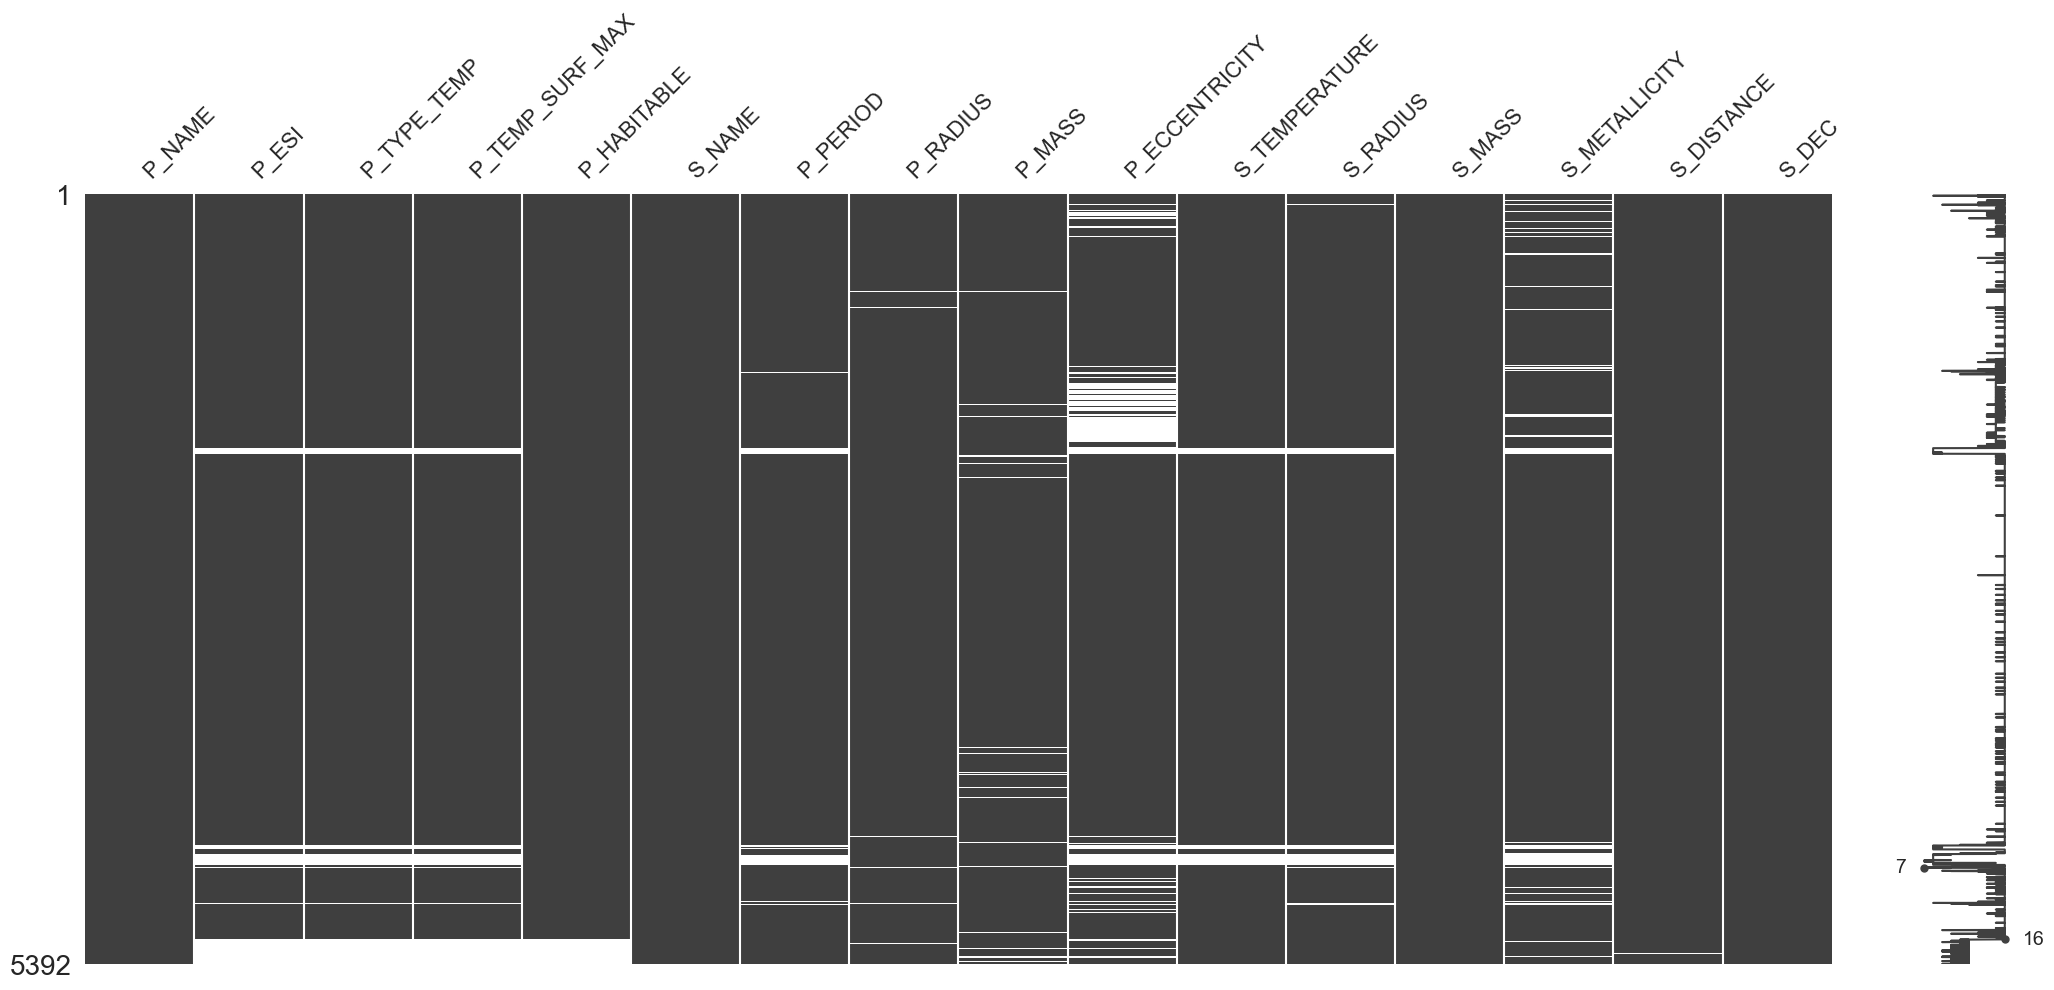

In [39]:
msno.matrix(copy_df)

# ------------------------------------------------------------------------------------------------------

# Data Preprocessing

### checking missing rows in P_HABITABLE before data processing

In [34]:
missing_habit = copy_df['P_HABITABLE'].isna().sum()
print(f"Number of missing 'P_HABITABLE' values: {missing_habit}")

Number of missing 'P_HABITABLE' values: 172


### Handling Numeric and Categorical Columns

In [42]:
df = copy_df

# Separating the features and label
X = df.drop(columns=['P_HABITABLE'])
y = df['P_HABITABLE']

# Identifying the categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# using preprocessors for numeric and categorical columns
numeric_preprocessor = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5))
])

categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Using Column Transformer to pass the processors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocessor, numeric_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ])

# Preprocessing the features
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=numeric_cols + categorical_cols, index=X.index)

# Merging the processed features with the label
processed_df = pd.concat([X_preprocessed_df, y], axis=1)

print("Dataset after preprocessing:\n",processed_df.head())

Dataset after preprocessing:
       P_ESI P_TEMP_SURF_MAX   P_PERIOD P_RADIUS     P_MASS P_ECCENTRICITY  \
0  0.083004       1050.6612     326.03  12.1068  6165.8633          0.231   
1  0.081792       982.27048  516.21997  12.2189  4684.7848           0.08   
2  0.081758       871.32801     185.84  12.8915  1525.5744            0.0   
3   0.16331       199.75558  1765.0389  12.5552  2586.7417       0.372689   
4  0.368405       417.43772      798.5   13.452  565.73385           0.68   

  S_TEMPERATURE S_RADIUS S_MASS S_METALLICITY S_DISTANCE      S_DEC  \
0        4742.0     19.0    2.7         -0.35    93.1846  17.793252   
1        4213.0    29.79   2.78         -0.02    125.321  71.823943   
2        4813.0     11.0    2.2         -0.24    75.4392  39.235837   
3        5338.0     0.93   0.91         0.405    17.9323  43.816362   
4        5750.0     1.13   1.08          0.06    21.1397  50.516824   

       P_NAME P_TYPE_TEMP    S_NAME  P_HABITABLE  
0    11 Com b         Hot    

In [44]:
processed_df

P_ESI P_TEMP_SURF_MAX   P_PERIOD P_RADIUS       P_MASS  \
0     0.083004       1050.6612     326.03  12.1068    6165.8633   
1     0.081792       982.27048  516.21997  12.2189    4684.7848   
2     0.081758       871.32801     185.84  12.8915    1525.5744   
3      0.16331       199.75558  1765.0389  12.5552    2586.7417   
4     0.368405       417.43772      798.5   13.452    565.73385   
...        ...             ...        ...      ...          ...   
5387    0.4134      657.630002    83.9997    2.167  1037.915646   
5388  0.240145      784.899656   3.183792    3.186       16.137   
5389   0.23248      904.816694  11.098644    2.453   860.887991   
5390  0.258291     1023.884654   1.446885     1.95         15.2   
5391  0.365919      726.548602   0.573474     1.24         2.53   

     P_ECCENTRICITY S_TEMPERATURE S_RADIUS S_MASS S_METALLICITY S_DISTANCE  \
0             0.231        4742.0     19.0    2.7         -0.35    93.1846   
1              0.08        4213.0    29.79   2.78         -0.02    125.321   
2               0.0        4813.0     11.0    2.2         -0.24    75.4392   
3          0.372689        5338.0     0.93   0.91         0.405    17.9323   
4              0.68        5750.0     1.13   1.08          0.06    21.1397   
...             ...           ...      ...    ...           ...        ...   
5387          0.112        3770.2     0.53   0.56         0.022    46.0891   
5388          0.132        5626.0     1.03   0.95          0.08    175.748   
5389           0.12        4969.0     0.73   0.82        -0.133    65.1769   
5390         0.0246        4597.4     0.77   0.85       -0.1034    100.588   
5391            0.0        3542.0     0.41   0.41         -0.17    28.5321   

          S_DEC      P_NAME P_TYPE_TEMP    S_NAME  P_HABITABLE  
0     17.793252    11 Com b         Hot    11 Com          0.0  
1     71.823943    11 UMi b         Hot    11 UMi          0.0  
2     39.235837    14 And b         Hot    14 And          0.0  
3     43.816362    14 Her b        Cold    14 Her          0.0  
4     50.516824  16 Cyg B b        Warm  16 Cyg B          0.0  
...         ...         ...         ...       ...          ...  
5387 -83.129726   TOI-904 c         Hot   TOI-904          NaN  
5388 -81.250745   TOI-908 b         Hot   TOI-908          NaN  
5389 -80.803427   TOI-913 b         Hot   TOI-913          NaN  
5390   1.859893   WASP-84 c         Hot   WASP-84          NaN  
5391  35.570548  Wolf 327 b         Hot  Wolf 327          NaN  

[5392 rows x 16 columns]

### Shape of dataframe now

In [45]:
processed_df.shape

(5392, 16)

### Missing values now

In [46]:
print(processed_df.isna().sum())

P_ESI                0
P_TEMP_SURF_MAX      0
P_PERIOD             0
P_RADIUS             0
P_MASS               0
P_ECCENTRICITY       0
S_TEMPERATURE        0
S_RADIUS             0
S_MASS               0
S_METALLICITY        0
S_DISTANCE           0
S_DEC                0
P_NAME               0
P_TYPE_TEMP          0
S_NAME               0
P_HABITABLE        172
dtype: int64


### Handling P_HABITABLE column for missing data

In [48]:
# Separating the known and unknown values in P_HABITABLE
known_mask = processed_df['P_HABITABLE'].notna()
unknown_mask = processed_df['P_HABITABLE'].isna()

X_known = processed_df.loc[known_mask].drop(columns=['P_HABITABLE'])
y_known = processed_df.loc[known_mask, 'P_HABITABLE']
X_unknown = processed_df.loc[unknown_mask].drop(columns=['P_HABITABLE'])

# Training the model for predicting P_HABITABLE
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross checking the categorical columns are encoded 
categorical_cols_known = X_known.select_dtypes(include=['object']).columns.tolist()
X_known_encoded = pd.get_dummies(X_known, columns=categorical_cols_known, drop_first=True)
X_unknown_encoded = pd.get_dummies(X_unknown, columns=categorical_cols_known, drop_first=True)

# Fitting the model
X_unknown_encoded = X_unknown_encoded.reindex(columns=X_known_encoded.columns, fill_value=0)
model.fit(X_known_encoded, y_known)

# Predicting the blank values in 'P_HABITABLE'
predicted_habitable = model.predict(X_unknown_encoded)

# Filling the blank 'P_HABITABLE' values in the processed_df dataframe
processed_df.loc[unknown_mask, 'P_HABITABLE'] = predicted_habitable

# Final preprocessed data
final_df = processed_df.copy()
print(final_df.head())

# Checking if all the missing values are filled
if final_df['P_HABITABLE'].isna().sum() == 0:
    print("All the blank 'P_HABITABLE' values are filled")
else:
    print("Blank values still present")

      P_ESI P_TEMP_SURF_MAX   P_PERIOD P_RADIUS     P_MASS P_ECCENTRICITY  \
0  0.083004       1050.6612     326.03  12.1068  6165.8633          0.231   
1  0.081792       982.27048  516.21997  12.2189  4684.7848           0.08   
2  0.081758       871.32801     185.84  12.8915  1525.5744            0.0   
3   0.16331       199.75558  1765.0389  12.5552  2586.7417       0.372689   
4  0.368405       417.43772      798.5   13.452  565.73385           0.68   

  S_TEMPERATURE S_RADIUS S_MASS S_METALLICITY S_DISTANCE      S_DEC  \
0        4742.0     19.0    2.7         -0.35    93.1846  17.793252   
1        4213.0    29.79   2.78         -0.02    125.321  71.823943   
2        4813.0     11.0    2.2         -0.24    75.4392  39.235837   
3        5338.0     0.93   0.91         0.405    17.9323  43.816362   
4        5750.0     1.13   1.08          0.06    21.1397  50.516824   

       P_NAME P_TYPE_TEMP    S_NAME  P_HABITABLE  
0    11 Com b         Hot    11 Com          0.0  
1    11 

In [49]:
missing_habit = final_df['P_HABITABLE'].isna().sum()
print("Number of missing 'P_HABITABLE' values:", missing_habit)

Number of missing 'P_HABITABLE' values: 0


In [218]:
print(final_df.isna().sum())

P_ESI              0
P_TEMP_SURF_MAX    0
P_PERIOD           0
P_RADIUS           0
P_MASS             0
P_ECCENTRICITY     0
S_TEMPERATURE      0
S_RADIUS           0
S_MASS             0
S_METALLICITY      0
S_DISTANCE         0
S_DEC              0
P_NAME             0
P_TYPE_TEMP        0
S_NAME             0
P_HABITABLE        0
dtype: int64


### Visualizing missing data distribution in final_df

<Axes: >

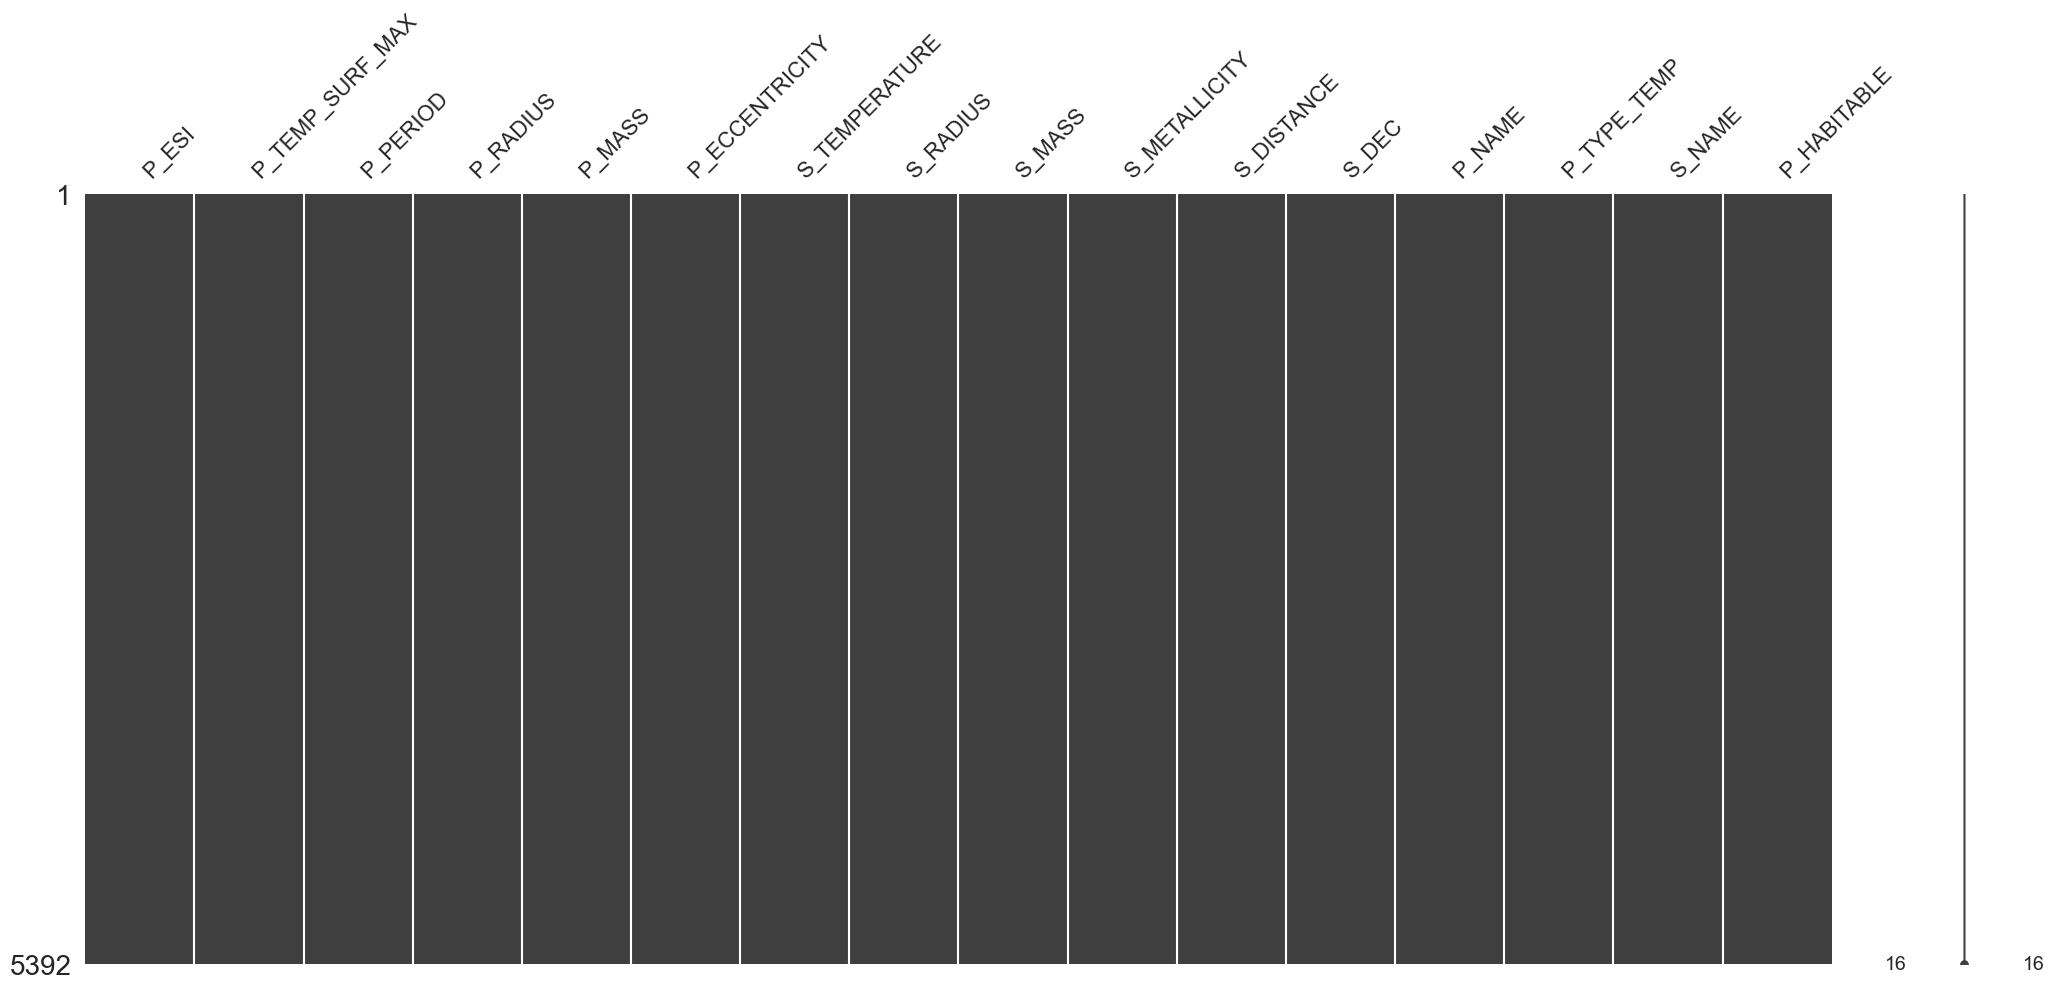

In [219]:
msno.matrix(final_df)

In [220]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_ESI            5392 non-null   object 
 1   P_TEMP_SURF_MAX  5392 non-null   object 
 2   P_PERIOD         5392 non-null   object 
 3   P_RADIUS         5392 non-null   object 
 4   P_MASS           5392 non-null   object 
 5   P_ECCENTRICITY   5392 non-null   object 
 6   S_TEMPERATURE    5392 non-null   object 
 7   S_RADIUS         5392 non-null   object 
 8   S_MASS           5392 non-null   object 
 9   S_METALLICITY    5392 non-null   object 
 10  S_DISTANCE       5392 non-null   object 
 11  S_DEC            5392 non-null   object 
 12  P_NAME           5392 non-null   object 
 13  P_TYPE_TEMP      5392 non-null   object 
 14  S_NAME           5392 non-null   object 
 15  P_HABITABLE      5392 non-null   float64
dtypes: float64(1), object(15)
memory usage: 674.1+ KB


### Converting data types back to actual state

In [50]:
final_df[final_df.columns.difference(['P_NAME', 'S_NAME', 'P_TYPE_TEMP'])] = final_df[final_df.columns.difference(['P_NAME', 'S_NAME', 'P_TYPE_TEMP'])].apply(pd.to_numeric)


### Summary of Final preprocessed dataset

In [51]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_ESI            5392 non-null   float64
 1   P_TEMP_SURF_MAX  5392 non-null   float64
 2   P_PERIOD         5392 non-null   float64
 3   P_RADIUS         5392 non-null   float64
 4   P_MASS           5392 non-null   float64
 5   P_ECCENTRICITY   5392 non-null   float64
 6   S_TEMPERATURE    5392 non-null   float64
 7   S_RADIUS         5392 non-null   float64
 8   S_MASS           5392 non-null   float64
 9   S_METALLICITY    5392 non-null   float64
 10  S_DISTANCE       5392 non-null   float64
 11  S_DEC            5392 non-null   float64
 12  P_NAME           5392 non-null   object 
 13  P_TYPE_TEMP      5392 non-null   object 
 14  S_NAME           5392 non-null   object 
 15  P_HABITABLE      5392 non-null   float64
dtypes: float64(13), object(3)
memory usage: 674.1+ KB


### Saving to system

In [388]:
final_df.to_csv("final_df.csv")

In [52]:
final_df

P_ESI  P_TEMP_SURF_MAX     P_PERIOD  P_RADIUS       P_MASS  \
0     0.083004      1050.661200   326.030000   12.1068  6165.863300   
1     0.081792       982.270480   516.219970   12.2189  4684.784800   
2     0.081758       871.328010   185.840000   12.8915  1525.574400   
3     0.163310       199.755580  1765.038900   12.5552  2586.741700   
4     0.368405       417.437720   798.500000   13.4520   565.733850   
...        ...              ...          ...       ...          ...   
5387  0.413400       657.630002    83.999700    2.1670  1037.915646   
5388  0.240145       784.899656     3.183792    3.1860    16.137000   
5389  0.232480       904.816694    11.098644    2.4530   860.887991   
5390  0.258291      1023.884654     1.446885    1.9500    15.200000   
5391  0.365919       726.548602     0.573474    1.2400     2.530000   

      P_ECCENTRICITY  S_TEMPERATURE  S_RADIUS  S_MASS  S_METALLICITY  \
0           0.231000         4742.0     19.00    2.70        -0.3500   
1           0.080000         4213.0     29.79    2.78        -0.0200   
2           0.000000         4813.0     11.00    2.20        -0.2400   
3           0.372689         5338.0      0.93    0.91         0.4050   
4           0.680000         5750.0      1.13    1.08         0.0600   
...              ...            ...       ...     ...            ...   
5387        0.112000         3770.2      0.53    0.56         0.0220   
5388        0.132000         5626.0      1.03    0.95         0.0800   
5389        0.120000         4969.0      0.73    0.82        -0.1330   
5390        0.024600         4597.4      0.77    0.85        -0.1034   
5391        0.000000         3542.0      0.41    0.41        -0.1700   

      S_DISTANCE      S_DEC      P_NAME P_TYPE_TEMP    S_NAME  P_HABITABLE  
0        93.1846  17.793252    11 Com b         Hot    11 Com          0.0  
1       125.3210  71.823943    11 UMi b         Hot    11 UMi          0.0  
2        75.4392  39.235837    14 And b         Hot    14 And          0.0  
3        17.9323  43.816362    14 Her b        Cold    14 Her          0.0  
4        21.1397  50.516824  16 Cyg B b        Warm  16 Cyg B          0.0  
...          ...        ...         ...         ...       ...          ...  
5387     46.0891 -83.129726   TOI-904 c         Hot   TOI-904          0.0  
5388    175.7480 -81.250745   TOI-908 b         Hot   TOI-908          0.0  
5389     65.1769 -80.803427   TOI-913 b         Hot   TOI-913          0.0  
5390    100.5880   1.859893   WASP-84 c         Hot   WASP-84          0.0  
5391     28.5321  35.570548  Wolf 327 b         Hot  Wolf 327          0.0  

[5392 rows x 16 columns]

### Copying data for security

In [53]:
new_df=final_df

In [54]:
project_df =new_df

### Majority (0) and Minority Class (1,2) Distribution

In [55]:
count = new_df['P_HABITABLE'].value_counts()
'''
0 --> not habitable 
1 --> potential habitable
2 --> confirmed habitable
'''
count

P_HABITABLE
0.0    5331
2.0      39
1.0      22
Name: count, dtype: int64

### Minority class 0,1 data

In [56]:
minor_class_count = new_df[new_df.P_HABITABLE != 0]
minor_class_count

P_ESI  P_TEMP_SURF_MAX    P_PERIOD  P_RADIUS    P_MASS  \
174   0.858270        370.51647    6.689000   1.17705  1.738519   
175   0.859232        366.62739   13.031000   1.15463  1.639992   
188   0.686826        320.22819   25.630580   2.49983  6.801519   
192   0.695385        283.56666   24.329000   2.41015  6.401056   
193   0.475675        221.05088  106.300000   2.65677  7.561128   
...        ...              ...         ...       ...       ...   
4944  0.677152        226.07083    9.207540   1.04253  1.039298   
4945  0.575562        204.13185   12.352446   1.13221  1.322164   
4956  0.950567        297.86567    4.910000   1.02011  1.048832   
4957  0.675779        224.65643   11.409000   1.04253  1.109220   
5161  0.802351        324.96060   17.871900   1.65908  3.410295   

      P_ECCENTRICITY  S_TEMPERATURE  S_RADIUS  S_MASS  S_METALLICITY  \
174          0.29000         2953.0      0.16    0.12        -0.0800   
175          0.53000         2953.0      0.16    0.12        -0.0800   
188          0.09900         3500.0      0.41    0.40         0.1000   
192          0.09000         3371.0      0.41    0.43        -0.1980   
193          0.14000         3811.5      0.41    0.43        -0.1296   
...              ...            ...       ...     ...            ...   
4944         0.01007         2566.0      0.12    0.09         0.0400   
4945         0.00208         2566.0      0.12    0.09         0.0400   
4956         0.00000         2904.0      0.11    0.09        -0.1900   
4957         0.00000         2904.0      0.11    0.09        -0.1900   
5161         0.11000         3342.0      0.31    0.29        -0.0900   

      S_DISTANCE      S_DEC              P_NAME P_TYPE_TEMP            S_NAME  \
174     3.672780 -44.514310           GJ 1061 c        Warm           GJ 1061   
175     3.672780 -44.514310           GJ 1061 d        Warm           GJ 1061   
188    15.128500 -53.371177            GJ 163 c        Warm            GJ 163   
192    11.940700 -17.776194            GJ 180 c        Warm            GJ 180   
193    11.940700 -17.776194            GJ 180 d        Warm            GJ 180   
...          ...        ...                 ...         ...               ...   
4944   12.429889  -5.043462        TRAPPIST-1 f        Warm        TRAPPIST-1   
4945   12.429889  -5.043462        TRAPPIST-1 g        Warm        TRAPPIST-1   
4956    3.830780  16.864902  Teegarden's Star b        Warm  Teegarden's Star   
4957    3.830780  16.864902  Teegarden's Star c        Warm  Teegarden's Star   
5161    4.305920 -12.667687         Wolf 1061 c        Warm         Wolf 1061   

      P_HABITABLE  
174           1.0  
175           1.0  
188           2.0  
192           2.0  
193           2.0  
...           ...  
4944          1.0  
4945          1.0  
4956          1.0  
4957          1.0  
5161          2.0  

[61 rows x 16 columns]

### Percentage count of Classes 

In [57]:
count = project_df['P_HABITABLE'].value_counts()

print(f'Class 0: {count[0]}')
print(f'Class 1: {count[1]}')
print(f'Class 2: {count[2]}')

print(f'Percentage of Majority Class 0: {round((count[0] / sum(count)) * 100, 2)}%')
print(f'Percentage of Minority Class 1: {round((count[1] / sum(count)) * 100, 2)}%')
print(f'Percentage of Minority Class 2: {round((count[2] / sum(count)) * 100, 2)}%')


Class 0: 5331
Class 1: 22
Class 2: 39
Percentage of Majority Class 0: 98.87%
Percentage of Minority Class 1: 0.41%
Percentage of Minority Class 2: 0.72%


# ----------------------------------------------------------------------------------------------------------

# Data Visualizations

### Visualization of stellar mass and stellar temperature  with habitability

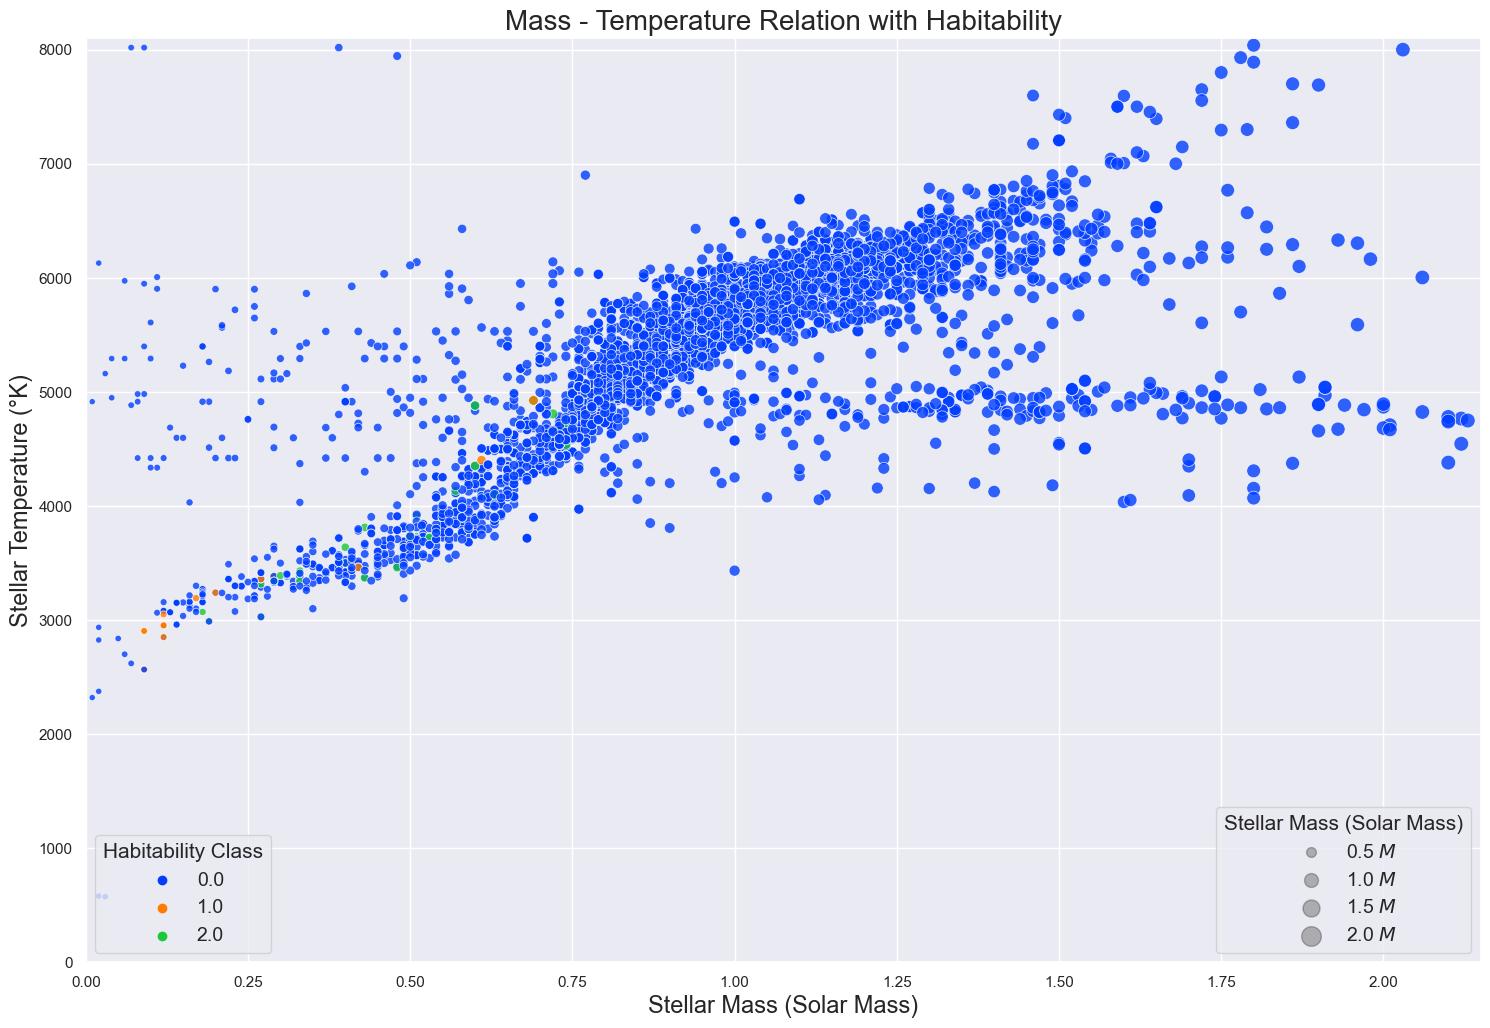

In [229]:
plt.figure(figsize=(18, 12))
ax = sns.scatterplot(x='S_MASS', y='S_TEMPERATURE',
                     hue='P_HABITABLE', palette='bright', size='S_MASS',
                     sizes=(20, 500), alpha=0.8, data=project_df, legend=False)

# S_MASS legend
for size in [0.5, 1.0, 1.5, 2.0]:
    plt.scatter([], [], c='k', alpha=0.3, s=100*size, label=f'{size} $M$')
legend_size = plt.legend(loc='lower right', title='Stellar Mass (Solar Mass)', fontsize=14, title_fontsize='15')
plt.gca().add_artist(legend_size)  

# P_HABITABLE legend
unique_labels = project_df['P_HABITABLE'].unique()
handles = []
colors = sns.color_palette('bright', len(unique_labels))
for i, label in enumerate(unique_labels):
    handles.append(plt.scatter([], [], color=colors[i], label=label))
legend_hue = ax.legend(handles=handles, title="Habitability Class", loc='lower left', fontsize=14, title_fontsize='15')

ax.axis([0, 2.15, 0, 8100])
ax.set_xlabel('Stellar Mass (Solar Mass)', fontsize=17)
ax.set_ylabel('Stellar Temperature (°K)', fontsize=17)
ax.set_title('Mass - Temperature Relation with Habitability', fontsize=20)

plt.show()


### Visualization of Stellar Redius with Degree

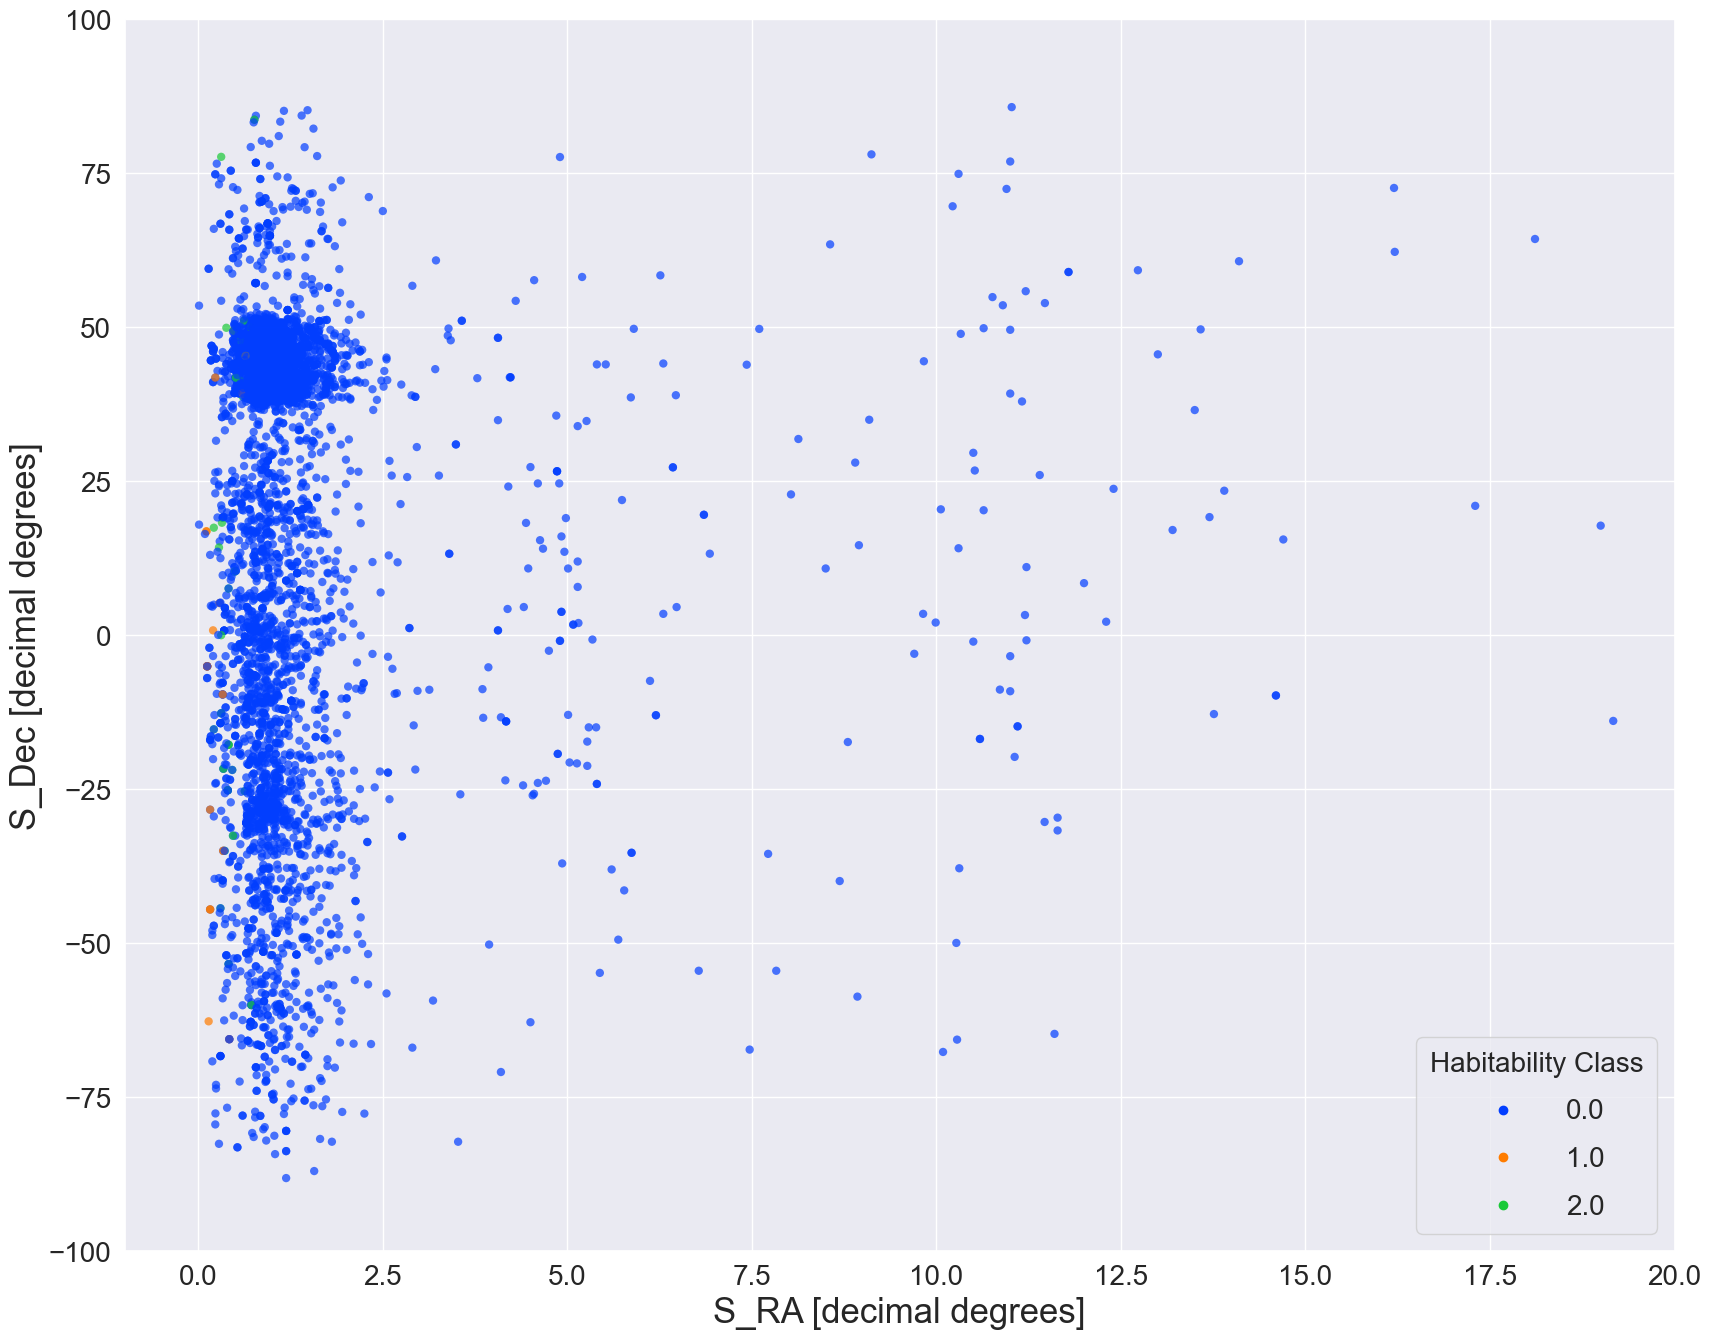

In [265]:
plt.figure(figsize=(20, 16))
ax = sns.scatterplot(x="S_RADIUS", y="S_DEC",
                     hue="P_HABITABLE", alpha=.7,
                     palette='bright', 
                     sizes=(1, 18), linewidth=0,
                     data=project_df)

plt.xlabel('S_RA [decimal degrees]', fontsize=25)
plt.ylabel('S_Dec [decimal degrees]', fontsize=25)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

legend = ax.legend(title="Habitability Class", loc="lower right", fontsize=25, title_fontsize='30')
plt.setp(legend.get_texts(), fontsize='20') 
plt.setp(legend.get_title(), fontsize='20')  

ax.axis([ -1, 20,-100, 100])
plt.show()

### Correlation Matrix - Heatmap

In [235]:
numeric_planets = project_df.select_dtypes(include=[float])
corr_mtrx = numeric_planets.corr()
if 'P_HABITABLE' in corr_mtrx.columns:
    corr_df = pd.DataFrame(corr_mtrx['P_HABITABLE'].sort_values(ascending=False))
    print("Correlation of features with label 'P_HABITABLE':")
    print(corr_df.head(10))
else:
    print("Column 'P_HABITABLE' is absent in the dataframe.")

Correlation of features with label 'P_HABITABLE':
                P_HABITABLE
P_HABITABLE        1.000000
P_ESI              0.371491
P_ECCENTRICITY     0.025856
P_PERIOD          -0.001577
P_MASS            -0.011495
S_DEC             -0.020694
S_RADIUS          -0.027540
S_DISTANCE        -0.047379
S_METALLICITY     -0.069555
P_RADIUS          -0.071937


In [233]:
corr_mtrx

P_ESI  P_TEMP_SURF_MAX  P_PERIOD  P_RADIUS    P_MASS  \
P_ESI            1.000000        -0.406412 -0.021581 -0.585339 -0.118299   
P_TEMP_SURF_MAX -0.406412         1.000000 -0.024694  0.041634 -0.044716   
P_PERIOD        -0.021581        -0.024694  1.000000  0.020102  0.006971   
P_RADIUS        -0.585339         0.041634  0.020102  1.000000  0.313811   
P_MASS          -0.118299        -0.044716  0.006971  0.313811  1.000000   
P_ECCENTRICITY  -0.108223        -0.159419  0.042377  0.383565  0.101663   
S_TEMPERATURE   -0.203257         0.282750 -0.015912  0.141522  0.060200   
S_RADIUS        -0.185175         0.053850 -0.004055  0.209230  0.105642   
S_MASS          -0.335651         0.202373 -0.019303  0.288000  0.139341   
S_METALLICITY   -0.168616         0.088368 -0.000448  0.169859 -0.007910   
S_DISTANCE      -0.020319         0.087105 -0.003174  0.001374 -0.009583   
S_DEC            0.168260         0.056170 -0.039215 -0.372384 -0.082773   
P_HABITABLE      0.371491        -0.119321 -0.001577 -0.071937 -0.011495   

                 P_ECCENTRICITY  S_TEMPERATURE  S_RADIUS    S_MASS  \
P_ESI                 -0.108223      -0.203257 -0.185175 -0.335651   
P_TEMP_SURF_MAX       -0.159419       0.282750  0.053850  0.202373   
P_PERIOD               0.042377      -0.015912 -0.004055 -0.019303   
P_RADIUS               0.383565       0.141522  0.209230  0.288000   
P_MASS                 0.101663       0.060200  0.105642  0.139341   
P_ECCENTRICITY         1.000000      -0.007787  0.117210  0.108928   
S_TEMPERATURE         -0.007787       1.000000 -0.038046  0.198114   
S_RADIUS               0.117210      -0.038046  1.000000  0.540716   
S_MASS                 0.108928       0.198114  0.540716  1.000000   
S_METALLICITY          0.062485       0.042763 -0.107615  0.079094   
S_DISTANCE            -0.218849       0.099131 -0.027250 -0.082070   
S_DEC                 -0.308738       0.047883  0.030756  0.061116   
P_HABITABLE            0.025856      -0.087631 -0.027540 -0.108054   

                 S_METALLICITY  S_DISTANCE     S_DEC  P_HABITABLE  
P_ESI                -0.168616   -0.020319  0.168260     0.371491  
P_TEMP_SURF_MAX       0.088368    0.087105  0.056170    -0.119321  
P_PERIOD             -0.000448   -0.003174 -0.039215    -0.001577  
P_RADIUS              0.169859    0.001374 -0.372384    -0.071937  
P_MASS               -0.007910   -0.009583 -0.082773    -0.011495  
P_ECCENTRICITY        0.062485   -0.218849 -0.308738     0.025856  
S_TEMPERATURE         0.042763    0.099131  0.047883    -0.087631  
S_RADIUS             -0.107615   -0.027250  0.030756    -0.027540  
S_MASS                0.079094   -0.082070  0.061116    -0.108054  
S_METALLICITY         1.000000    0.081972 -0.004464    -0.069555  
S_DISTANCE            0.081972    1.000000  0.026336    -0.047379  
S_DEC                -0.004464    0.026336  1.000000    -0.020694  
P_HABITABLE          -0.069555   -0.047379 -0.020694     1.000000

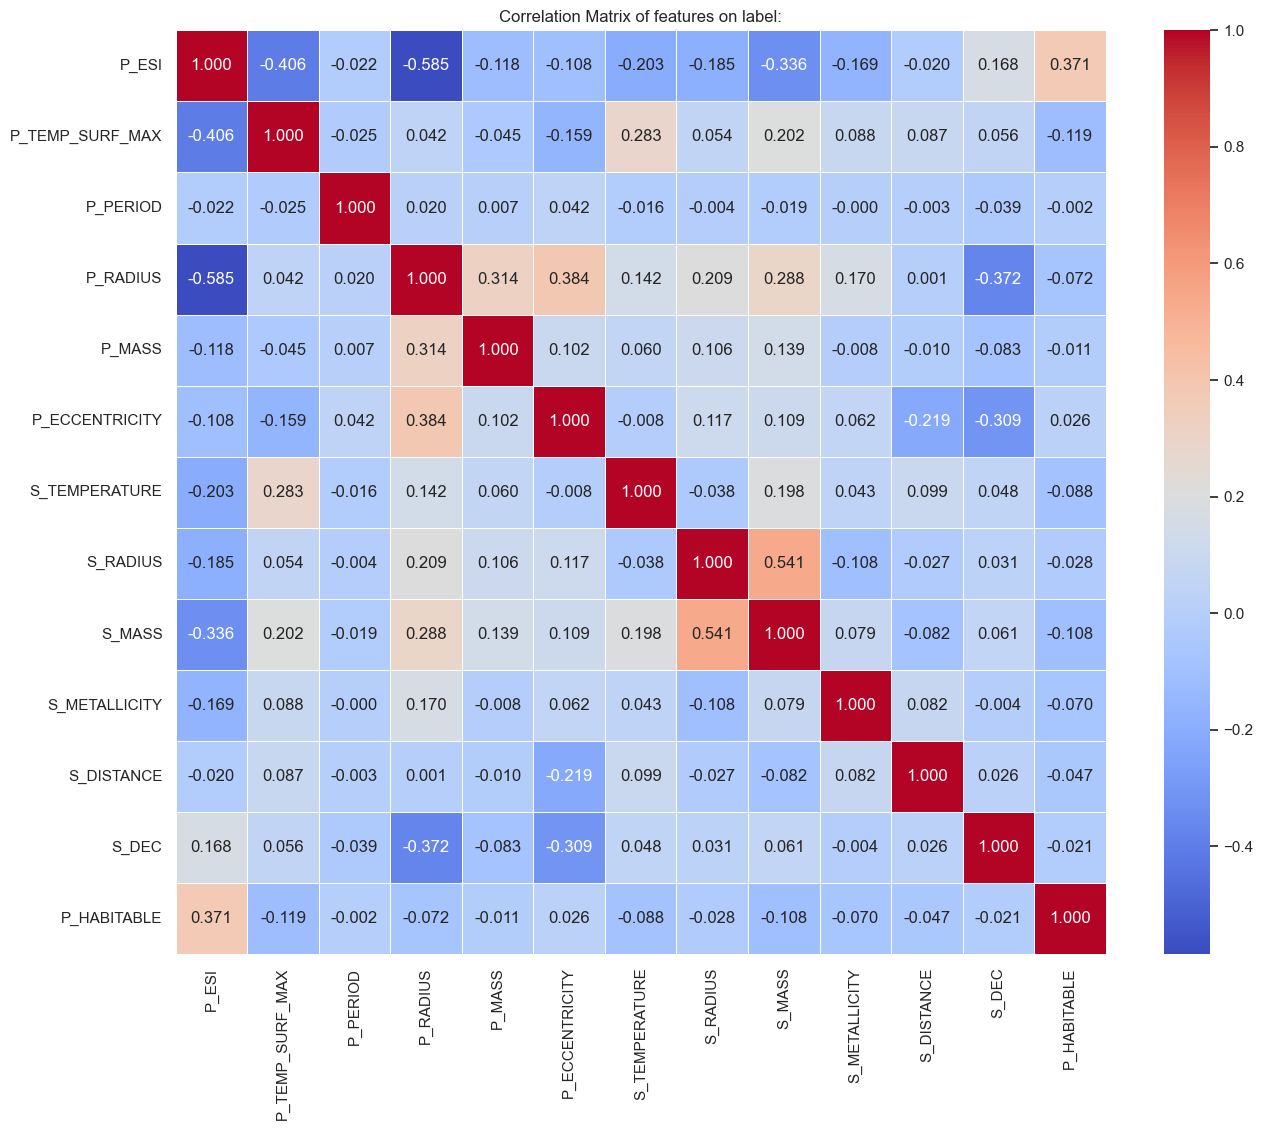

In [239]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_mtrx, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.7)
plt.title("Correlation Matrix of features on label:")
plt.show()

### Pair plot for pair of continuous varible pairs

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x700 with 0 Axes>

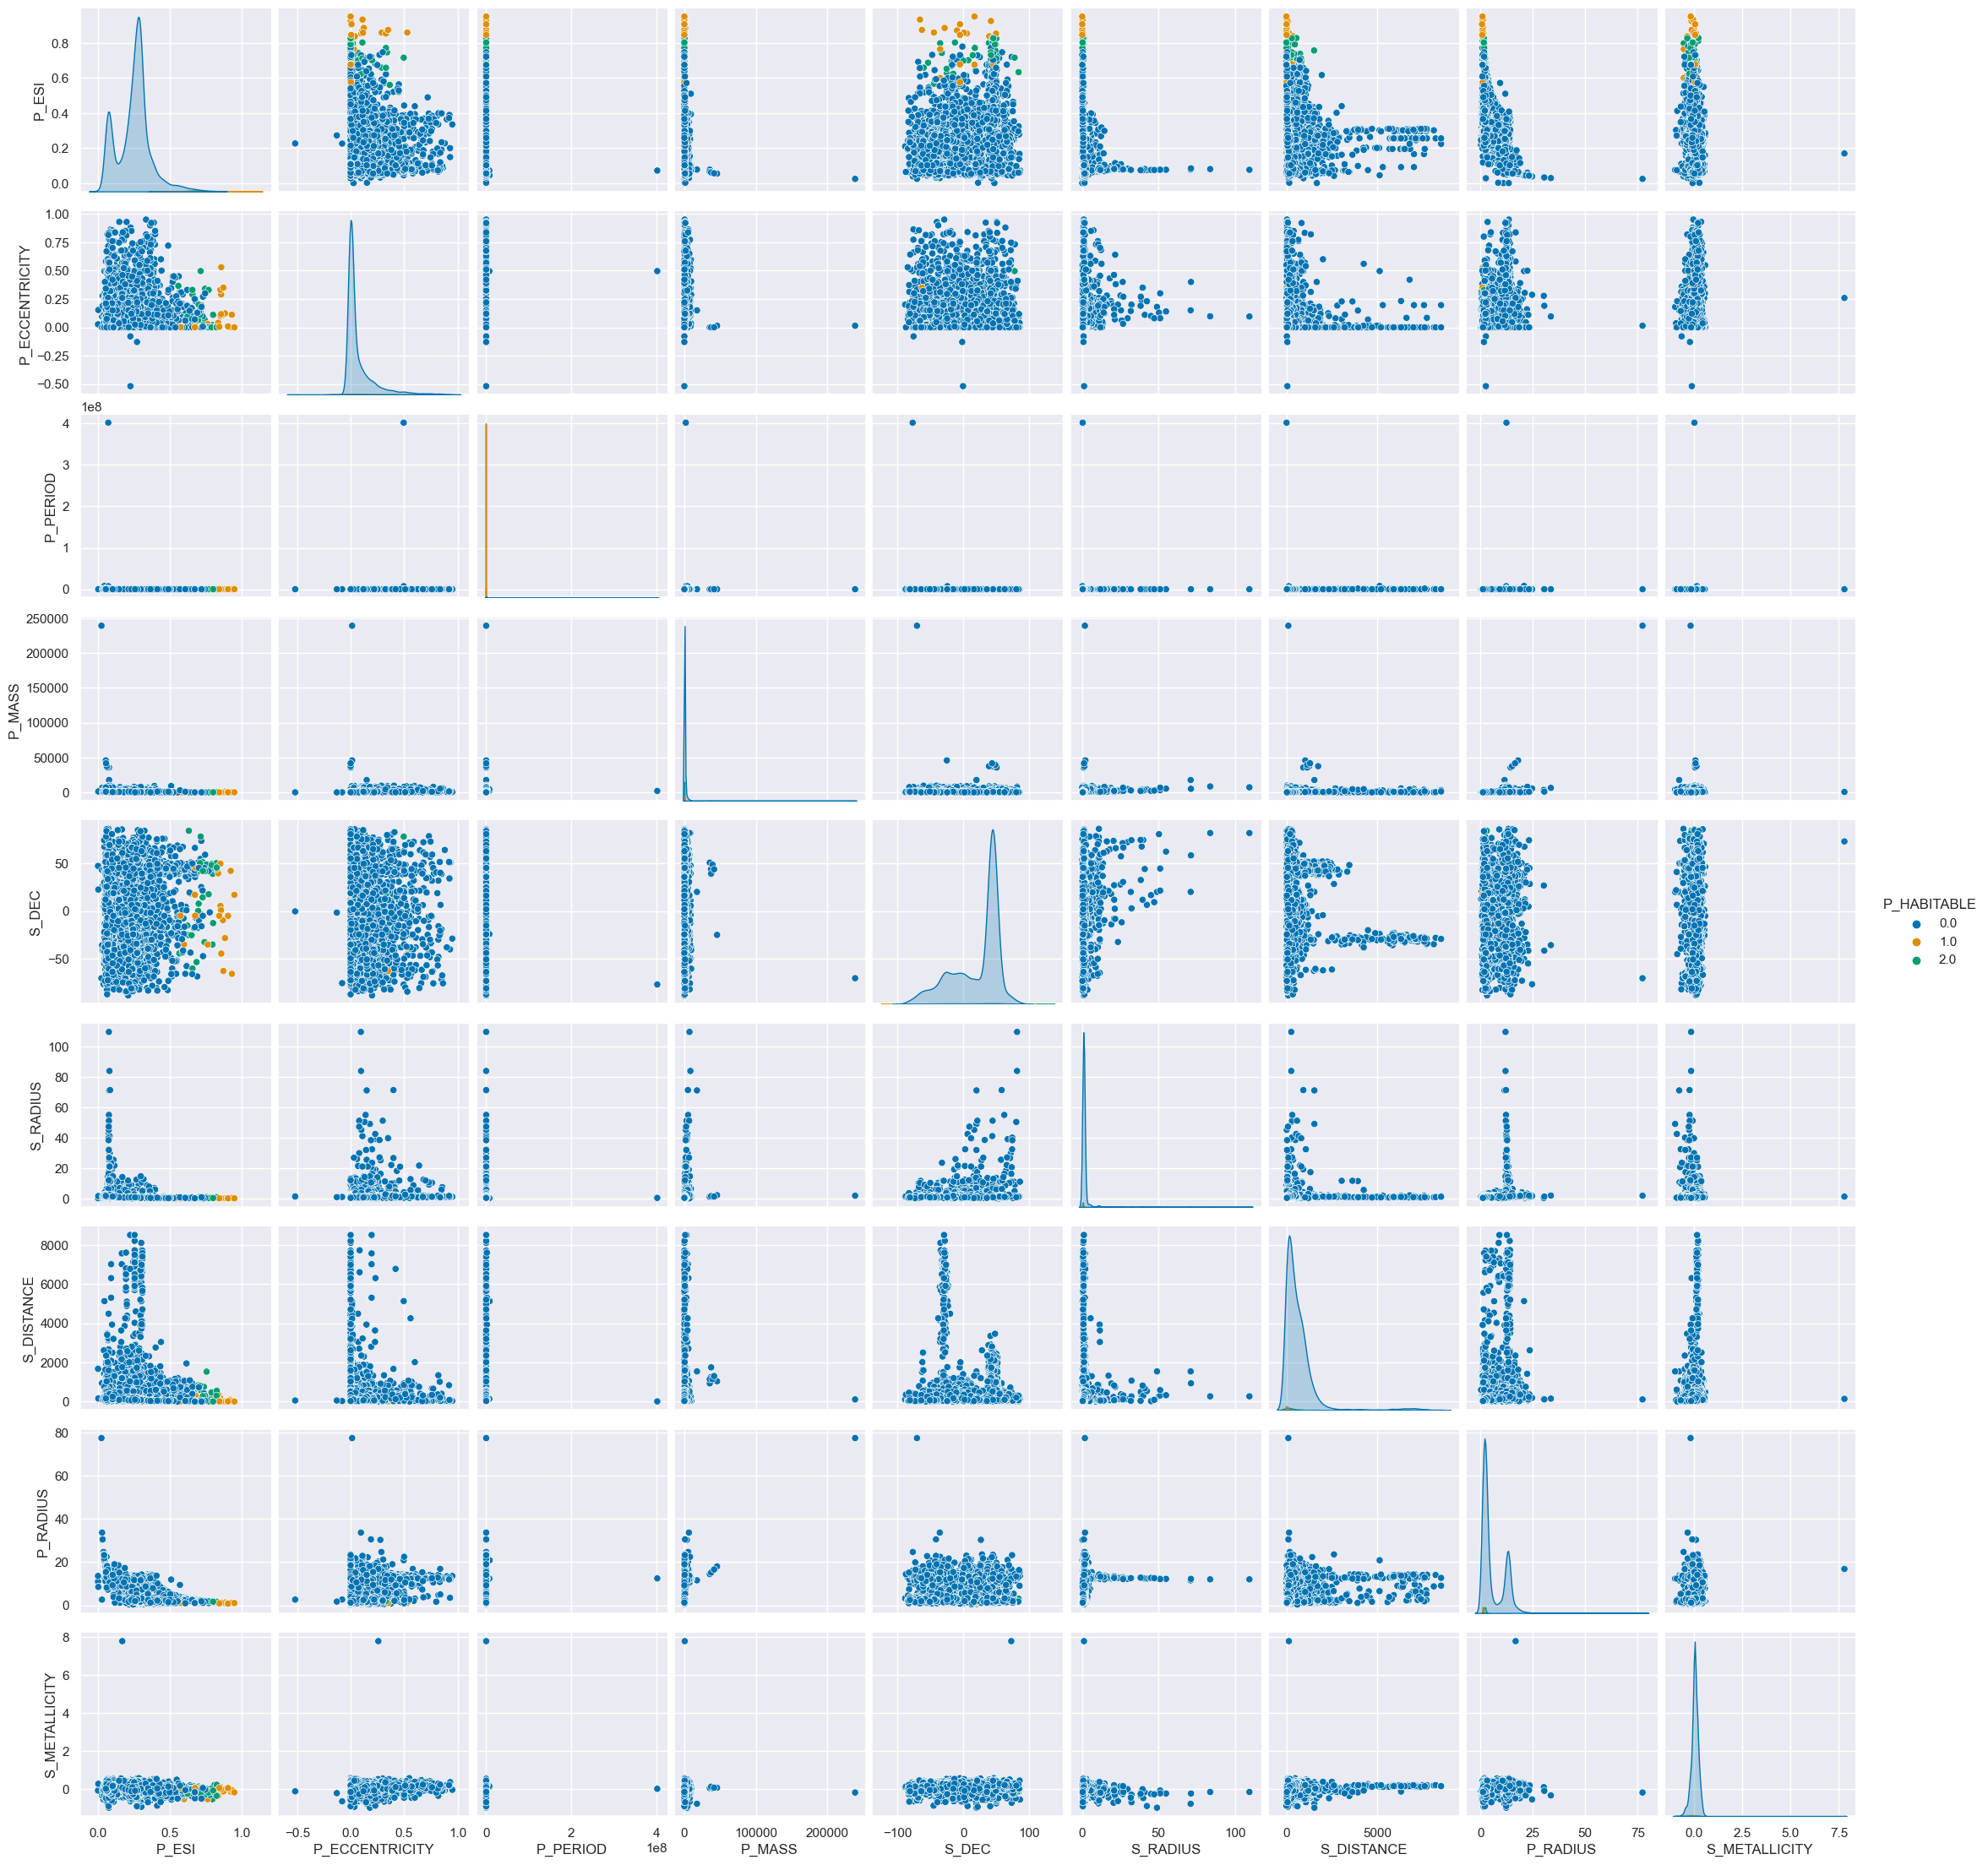

In [240]:
plt.figure(figsize=(15, 7))
sns.pairplot(project_df[['P_HABITABLE', 'P_ESI', 'P_ECCENTRICITY', 'P_PERIOD', 'P_MASS', 'S_DEC', 'S_RADIUS', 'S_DISTANCE', 'P_RADIUS', 'S_METALLICITY']], 
             hue='P_HABITABLE', 
             palette='colorblind')

plt.show()

### Bar Plot for categories in P_TYPE_TEMP

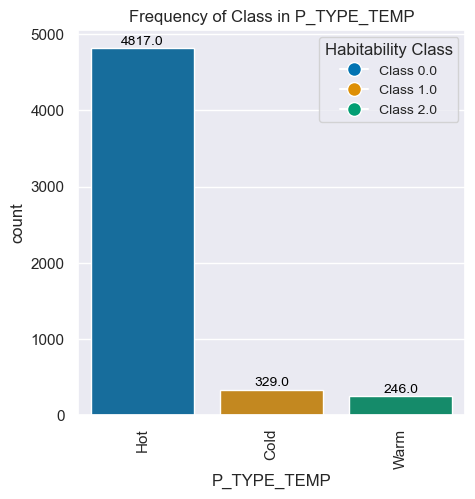

In [258]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='P_TYPE_TEMP', data=project_df, palette='colorblind')
plt.title('Frequency of Class in P_TYPE_TEMP')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

unique_labels = project_df['P_HABITABLE'].unique()
colors = sns.color_palette('colorblind', len(unique_labels))
legend_labels = [f'Class {label}' for label in unique_labels]
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10) for i in range(len(unique_labels))]

ax.legend(handles, legend_labels, title='Habitability Class', loc='upper right', fontsize=10, title_fontsize='12')
plt.show()

### Pie chart for categories in P_TYPE_TEMP

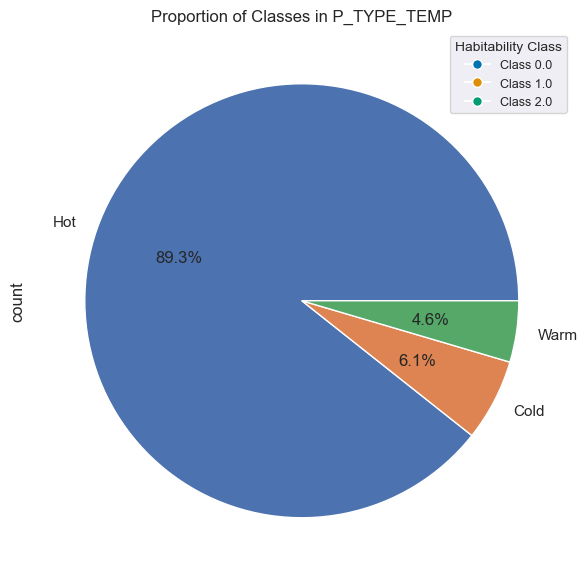

In [293]:
plt.figure(figsize=(7,8))
project_df['P_TYPE_TEMP'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Classes in P_TYPE_TEMP')

unique_labels = project_df['P_HABITABLE'].unique()
colors = sns.color_palette('colorblind', len(unique_labels))
legend_labels = [f'Class {label}' for label in unique_labels]
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=7) for i in range(len(unique_labels))]

plt.legend(handles, legend_labels, title='Habitability Class', loc='upper right', fontsize=9, title_fontsize='10')
plt.show()

### Class count for Habitability

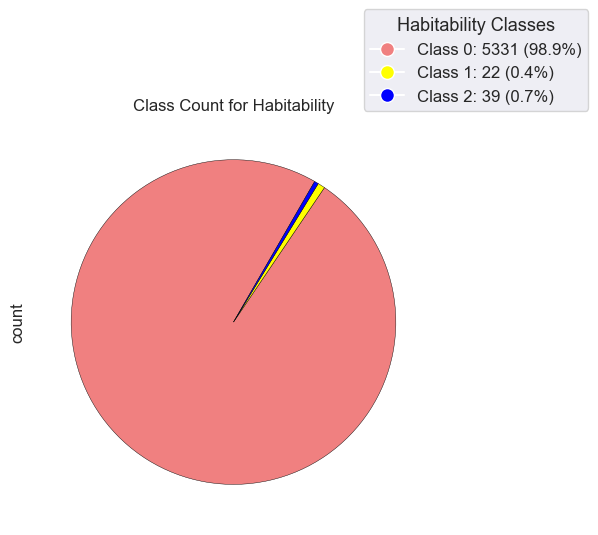

In [303]:
count = project_df['P_HABITABLE'].value_counts()
total = count.sum()
percentages = (count / total) * 100

colors = ['lightcoral', 'yellow', 'blue']  
fig, ax = plt.subplots(figsize=(6, 6))
count.plot(kind='pie', colors=colors, ax=ax, startangle=60, labels=['']*len(count), 
           wedgeprops={'linewidth': 0.3, 'edgecolor': 'black'})

ax.set_title('Class Count for Habitability')
legend_labels = [f'Class {i}: {count[i]} ({percentages[i]:.1f}%)' for i in range(len(count))]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
plt.legend(handles, legend_labels, title="Habitability Classes", loc="lower left", fontsize=12, title_fontsize='13', bbox_to_anchor=(0.8, 1))

plt.tight_layout()
plt.show()


### Distribution of Planet temperature type for sustaining Habitability

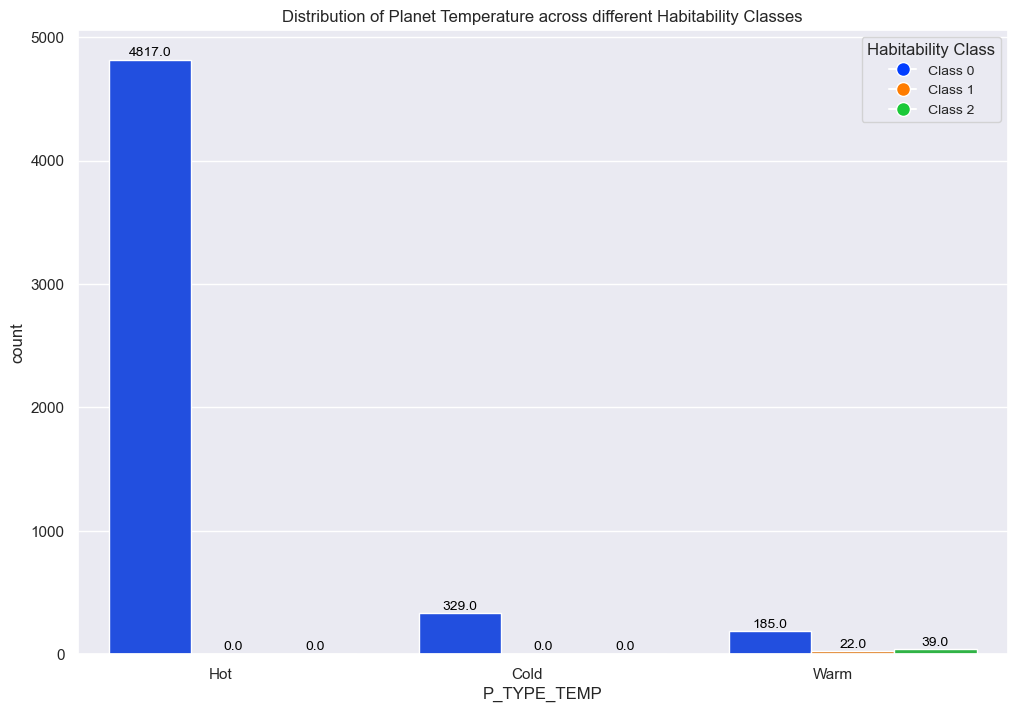

In [321]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='P_TYPE_TEMP', hue='P_HABITABLE', data=project_df, palette='bright', dodge=True)
plt.title('Distribution of Planet Temperature across different Habitability Classes')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')


for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.subplots_adjust(bottom=0.1)
legend_labels = ['Class 0', 'Class 1', 'Class 2']
colors = sns.color_palette('bright', len(legend_labels))
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10) for i in range(len(legend_labels))]

plt.legend(handles, legend_labels, title='Habitability Class', loc='upper right', fontsize=10, title_fontsize='12')

plt.show()

# --------------------------------------------------------------------------------------------------------

# Class Imbalance Handling

In [69]:
project_df

P_ESI  P_TEMP_SURF_MAX     P_PERIOD  P_RADIUS       P_MASS  \
0     0.083004      1050.661200   326.030000   12.1068  6165.863300   
1     0.081792       982.270480   516.219970   12.2189  4684.784800   
2     0.081758       871.328010   185.840000   12.8915  1525.574400   
3     0.163310       199.755580  1765.038900   12.5552  2586.741700   
4     0.368405       417.437720   798.500000   13.4520   565.733850   
...        ...              ...          ...       ...          ...   
5387  0.413400       657.630002    83.999700    2.1670  1037.915646   
5388  0.240145       784.899656     3.183792    3.1860    16.137000   
5389  0.232480       904.816694    11.098644    2.4530   860.887991   
5390  0.258291      1023.884654     1.446885    1.9500    15.200000   
5391  0.365919       726.548602     0.573474    1.2400     2.530000   

      P_ECCENTRICITY  S_TEMPERATURE  S_RADIUS  S_MASS  S_METALLICITY  \
0           0.231000         4742.0     19.00    2.70        -0.3500   
1           0.080000         4213.0     29.79    2.78        -0.0200   
2           0.000000         4813.0     11.00    2.20        -0.2400   
3           0.372689         5338.0      0.93    0.91         0.4050   
4           0.680000         5750.0      1.13    1.08         0.0600   
...              ...            ...       ...     ...            ...   
5387        0.112000         3770.2      0.53    0.56         0.0220   
5388        0.132000         5626.0      1.03    0.95         0.0800   
5389        0.120000         4969.0      0.73    0.82        -0.1330   
5390        0.024600         4597.4      0.77    0.85        -0.1034   
5391        0.000000         3542.0      0.41    0.41        -0.1700   

      S_DISTANCE      S_DEC      P_NAME P_TYPE_TEMP    S_NAME  P_HABITABLE  
0        93.1846  17.793252    11 Com b         Hot    11 Com          0.0  
1       125.3210  71.823943    11 UMi b         Hot    11 UMi          0.0  
2        75.4392  39.235837    14 And b         Hot    14 And          0.0  
3        17.9323  43.816362    14 Her b        Cold    14 Her          0.0  
4        21.1397  50.516824  16 Cyg B b        Warm  16 Cyg B          0.0  
...          ...        ...         ...         ...       ...          ...  
5387     46.0891 -83.129726   TOI-904 c         Hot   TOI-904          0.0  
5388    175.7480 -81.250745   TOI-908 b         Hot   TOI-908          0.0  
5389     65.1769 -80.803427   TOI-913 b         Hot   TOI-913          0.0  
5390    100.5880   1.859893   WASP-84 c         Hot   WASP-84          0.0  
5391     28.5321  35.570548  Wolf 327 b         Hot  Wolf 327          0.0  

[5392 rows x 16 columns]

### Preparing the dataset for cGAN implementation

In [385]:
# Dropping features and spliting dataframe into features and label
X = project_df.drop(columns=['P_NAME', 'S_NAME', 'P_HABITABLE'])
y = project_df['P_HABITABLE']

# Encoding the feature 'P_TYPE_TEMP'
type_encoder = LabelEncoder()
X['P_TYPE_TEMP'] = type_encoder.fit_transform(X['P_TYPE_TEMP'])

X = X.apply(pd.to_numeric, errors='coerce')

# Scaling all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encoding the label
y = y.astype(int)
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Converting datatype for next operations
X_scaled_np = X_scaled.astype(np.float32)
y_encoded = y_encoded.astype(np.float32)

print(X_scaled_np.shape)
print(y_encoded.shape)

(5392, 13)
(5392, 3)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Prepared features and label

In [386]:
X_scaled_np

array([[-1.3448983 ,  0.21872984, -0.01532344, ..., -0.5725058 ,
        -0.06369361,  0.04719025],
       [-1.3543261 ,  0.09446058, -0.01528872, ..., -0.53906673,
         1.4532046 ,  0.04719025],
       [-1.354593  , -0.10712729, -0.01534904, ..., -0.59097046,
         0.53830165,  0.04719025],
       ...,
       [-0.18159275, -0.04627672, -0.01538095, ..., -0.60164875,
        -2.831771  ,  0.04719025],
       [ 0.01928192,  0.17007555, -0.01538271, ..., -0.5648023 ,
        -0.5110187 ,  0.04719025],
       [ 0.85690165, -0.37019852, -0.01538287, ..., -0.6397789 ,
         0.43539956,  0.04719025]], dtype=float32)

In [387]:
if isinstance(X_scaled_np, np.ndarray):
    print("X_scaled is a numpy array.")
else:
    print("X_scaled is not a numpy array.")

X_scaled is a numpy array.


In [388]:
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [389]:
if isinstance(y_encoded, np.ndarray):
    print("y_encoded is a numpy array.")
else:
    print("y_encoded is not a numpy array.")

y_encoded is a numpy array.


In [390]:
class_dim = y_encoded.shape[1]
output_dim = X_scaled_np.shape[1]

In [391]:
print("Shape of class_dim:", class_dim, "\nShape of output_dim:", output_dim)

Shape of class_dim: 3 
Shape of output_dim: 13


### cGAN Model

In [118]:
# Defining the hyperparameters after Trial and Error. This are the best possible parameters for this cGAN model
batch_size = 32 
epochs = 10000
sample_interval = 100
noise_dim = 90 

# Using custom Spectral normalization to stabilize the cGAN training
class SpectralNormalization(Constraint):
    def __init__(self, axis=-1):
        self.axis = axis
    def __call__(self, w):
        return w / (1e-9 + tf.reduce_max(tf.abs(w), axis=self.axis, keepdims=True))

# Generator function
def func_generator(noise_dim, class_dim, output_dim):
    noise_input = layers.Input(shape=(noise_dim,))
    class_input = layers.Input(shape=(class_dim,))
    concatenated = layers.Concatenate()([noise_input, class_input])
    x = layers.Dense(256, activation='relu')(concatenated)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    output = layers.Dense(output_dim, activation='sigmoid')(x) 
    model = models.Model([noise_input, class_input], output)
    return model

# Discriminator function
def func_discriminator(input_dim, class_dim):
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_dim=input_dim + class_dim, kernel_constraint=SpectralNormalization()),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu', kernel_constraint=SpectralNormalization()),
        layers.Dropout(0.4),
        layers.Dense(64, activation='relu', kernel_constraint=SpectralNormalization()),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# fetching shape of the scaled features and encoded label
class_dim = y_encoded.shape[1]
output_dim = X_scaled_np.shape[1]

# Building discriminator by using specific learning rate and loss function. Learning rate of 0.0002 which is farely low
# was not providing good results, so decreased the learning rate further.

discriminator = func_discriminator(output_dim, class_dim)
discriminator.compile(optimizer=optimizers.Adam(learning_rate=0.0001, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])

generator = func_generator(noise_dim, class_dim, output_dim)

# cGAN model
gan_input_noise = layers.Input(shape=(noise_dim,))
gan_input_class = layers.Input(shape=(class_dim,))
generated_dat = generator([gan_input_noise, gan_input_class])  

discriminator.trainable = False
gan_output = discriminator(layers.Concatenate()([generated_dat, gan_input_class]))
gan = models.Model([gan_input_noise, gan_input_class], gan_output)
gan.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')

# Training the cGAN
for epoch in range(epochs):
    # Selecting random batch of real data
    idx = np.random.randint(0, X_scaled_np.shape[0], batch_size)
    real_data = X_scaled_np[idx]
    real_labels = y_encoded[idx]

    # Generating synthetic data using the generator function
    noise = np.random.normal(0, 1, (batch_size, noise_dim))
    generated_dat = generator.predict([noise, real_labels])

    # Overfitting prevention and label smoothing
    real_data += 0.05 * np.random.normal(0, 1, real_data.shape)
    generated_dat += 0.05 * np.random.normal(0, 1, generated_dat.shape)

    real_labels_smoothed = 0.9 * np.ones((batch_size, 1))
    fake_labels_smoothed = np.zeros((batch_size, 1))

    # Training the discriminator function on real and synthetic data
    d_loss_real = discriminator.train_on_batch(np.hstack((real_data, real_labels)), real_labels_smoothed)
    d_loss_fake = discriminator.train_on_batch(np.hstack((generated_dat, real_labels)), fake_labels_smoothed)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Training the generator function
    noise = np.random.normal(0, 1, (batch_size, noise_dim))
    sampled_labels = np.random.randint(0, class_dim, batch_size)  
    sampled_labels_encoded = np.eye(class_dim)[sampled_labels]  
    g_loss = gan.train_on_batch([noise, sampled_labels_encoded], np.ones((batch_size, 1)))


    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")


1/1 [==============================] - 0s 90ms/step
0 [D loss: 13.08165043592453] [G loss: 22.532508850097656]
1/1 [==============================] - 0s 18ms/step
100 [D loss: 12.833401679992676] [G loss: 27.577430725097656]
1/1 [==============================] - 0s 21ms/step
200 [D loss: 7.63759708404541] [G loss: 21.41736602783203]
1/1 [==============================] - 0s 20ms/step
300 [D loss: 13.367576599121094] [G loss: 32.54377365112305]
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step
400 [D loss: 8.385334014892578] [G loss: 23.74604034423828]
1/1 [==============================] - 0s 17ms/step
500 [D loss: 6.834764719009399] [G loss: 29.254287719726562]
1/1 [==============================] - 0s 15ms/step
600 [D loss: 7.392344534397125] [G loss: 22.304546356201172]
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 17ms/step
700 [D loss: 4.99764096736908] [G loss: 25.756324768066406]
1/1 [==============================] - 0s 19ms/step
800 [D loss: 9.46937370300293] [G loss: 19.055587768554688]
1/1 [==============================] - 0s 15ms/step
900 [D loss: 6.9357874393463135] [G loss: 18.960617065429688]
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step
1000 [D loss: 6.25592440366745] [G loss: 17.535451889038086]
1/1 [==============================] - 0s 15ms/step
1100 [D loss: 4.515573024749756] [G loss: 10.874239921569824]
1/1 [==============================] - 0s 17ms/step
1200 [D loss: 4.102832734584808] [G loss: 10.502197265625]
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 17ms/step
1300 [D loss: 5.014526605606079] [G loss: 9.472362518310547]
1/1 [==============================] - 0s 16ms/step
1400 [D loss: 10.419238328933716] [G loss: 6.90320348739624]
1/1 [==============================] - 0s 16ms/step
1500 [D loss: 5.152655869722366] [G loss: 4.279146194458008]
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step
1600 [D loss: 3.277402400970459] [G loss: 6.342898368835449]
1/1 [==============================] - 0s 16ms/step
1700 [D loss: 3.0109047889709473] [G loss: 4.130372047424316]
1/1 [==============================] - 0s 15ms/step
1800 [D loss: 2.793028086423874] [G loss: 4.314343452453613]
1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 14ms/step
1900 [D loss: 2.0408301949501038] [G loss: 3.6479172706604004]
1/1 [==============================] - 0s 16ms/step
2000 [D loss: 2.2403609305620193] [G loss: 2.868044376373291]
1/1 [==============================] - 0s 16ms/step
2100 [D loss: 2.975243628025055] [G loss: 4.965058326721191]
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 13ms/step
2200 [D loss: 2.9248340129852295] [G loss: 2.95906925201416]
1/1 [==============================] - 0s 16ms/step
2300 [D loss: 2.237108528614044] [G loss: 4.208865165710449]
1/1 [==============================] - 0s 16ms/step
2400 [D loss: 1.9725231528282166] [G loss: 2.7873661518096924]
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2500 [D loss: 2.7869709730148315] [G loss: 2.5902388095855713]
1/1 [==============================] - 0s 11ms/step
2600 [D loss: 2.168918266892433] [G loss: 1.12196683883667]
1/1 [==============================] - 0s 15ms/step
2700 [D loss: 1.8518409579992294] [G loss: 3.0027337074279785]
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 17ms/step
2800 [D loss: 2.1920778080821037] [G loss: 3.556715965270996]
1/1 [==============================] - 0s 15ms/step
2900 [D loss: 2.0661413073539734] [G loss: 2.868500232696533]
1/1 [==============================] - 0s 15ms/step
3000 [D loss: 1.4239632785320282] [G loss: 1.3017098903656006]
1/1 [==============================] - 0s 15ms/step
3100 [D loss: 1.48306006193161] [G loss: 2.7758398056030273]
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
3200 [D loss: 2.0417537689208984] [G loss: 2.22294545173645]
1/1 [==============================] - 0s 15ms/step
3300 [D loss: 2.0003786981105804] [G loss: 4.432399749755859]
1/1 [==============================] - 0s 16ms/step
3400 [D loss: 1.692198634147644] [G loss: 3.009532928466797]
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
3500 [D loss: 1.9188836514949799] [G loss: 2.426560401916504]
1/1 [==============================] - 0s 16ms/step
3600 [D loss: 1.478832632303238] [G loss: 3.5314998626708984]
1/1 [==============================] - 0s 12ms/step
3700 [D loss: 1.1529440879821777] [G loss: 3.645358085632324]
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
3800 [D loss: 1.4276184178888798] [G loss: 2.228303909301758]
1/1 [==============================] - 0s 16ms/step
3900 [D loss: 1.827893853187561] [G loss: 3.742480993270874]
1/1 [==============================] - 0s 18ms/step
4000 [D loss: 1.2763718366622925] [G loss: 3.6308536529541016]
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 18ms/step
4100 [D loss: 1.124956876039505] [G loss: 2.443264961242676]
1/1 [==============================] - 0s 18ms/step
4200 [D loss: 0.8947812356054783] [G loss: 2.5573337078094482]
1/1 [==============================] - 0s 19ms/step
4300 [D loss: 1.0684881508350372] [G loss: 2.6258842945098877]
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step
4400 [D loss: 1.1364027559757233] [G loss: 2.7202091217041016]
1/1 [==============================] - 0s 20ms/step
4500 [D loss: 1.0738246478140354] [G loss: 2.237466335296631]
1/1 [==============================] - 0s 23ms/step
4600 [D loss: 0.9342489540576935] [G loss: 2.5761265754699707]
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step
4700 [D loss: 1.3890532553195953] [G loss: 2.2728872299194336]
1/1 [==============================] - 0s 18ms/step
4800 [D loss: 0.5561332888901234] [G loss: 2.1974031925201416]
1/1 [==============================] - 0s 18ms/step
4900 [D loss: 1.1578842252492905] [G loss: 1.6975449323654175]
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
5000 [D loss: 0.8769514337182045] [G loss: 2.0395896434783936]
1/1 [==============================] - 0s 17ms/step
5100 [D loss: 0.7764550000429153] [G loss: 2.5616326332092285]
1/1 [==============================] - 0s 18ms/step
5200 [D loss: 1.0029863119125366] [G loss: 1.5797672271728516]
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
5300 [D loss: 0.7439152002334595] [G loss: 2.4638617038726807]
1/1 [==============================] - 0s 18ms/step
5400 [D loss: 1.301419049501419] [G loss: 1.9881011247634888]
1/1 [==============================] - 0s 16ms/step
5500 [D loss: 0.43643057718873024] [G loss: 2.660295009613037]
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 17ms/step
5600 [D loss: 1.3526400923728943] [G loss: 2.3580243587493896]
1/1 [==============================] - 0s 17ms/step
5700 [D loss: 0.8502620607614517] [G loss: 1.3448611497879028]
1/1 [==============================] - 0s 16ms/step
5800 [D loss: 1.0967442840337753] [G loss: 1.5786267518997192]
1/1 [==============================] - 0s 17ms/step
5900 [D loss: 0.8912509977817535] [G loss: 1.91359543800354]
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 17ms/step
6000 [D loss: 1.0832115784287453] [G loss: 1.5019229650497437]
1/1 [==============================] - 0s 16ms/step
6100 [D loss: 1.0733400285243988] [G loss: 1.3893201351165771]
1/1 [==============================] - 0s 17ms/step
6200 [D loss: 0.9227228760719299] [G loss: 1.4975392818450928]
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
6300 [D loss: 0.6982681415975094] [G loss: 2.494884490966797]
1/1 [==============================] - 0s 18ms/step
6400 [D loss: 0.8905735611915588] [G loss: 1.844536304473877]
1/1 [==============================] - 0s 19ms/step
6500 [D loss: 0.7895990163087845] [G loss: 1.8729033470153809]
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step
6600 [D loss: 0.9505937695503235] [G loss: 2.2095656394958496]
1/1 [==============================] - 0s 15ms/step
6700 [D loss: 0.7255690768361092] [G loss: 1.5880162715911865]
1/1 [==============================] - 0s 18ms/step
6800 [D loss: 0.3947572708129883] [G loss: 1.6086812019348145]
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
6900 [D loss: 0.6755855530500412] [G loss: 1.6092792749404907]
1/1 [==============================] - 0s 17ms/step
7000 [D loss: 0.3908468596637249] [G loss: 1.85061776638031]
1/1 [==============================] - 0s 17ms/step
7100 [D loss: 0.5528283081948757] [G loss: 1.5666272640228271]
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 15ms/step
7200 [D loss: 0.5100108981132507] [G loss: 1.8212032318115234]
1/1 [==============================] - 0s 16ms/step
7300 [D loss: 0.5676564127206802] [G loss: 1.9051167964935303]
1/1 [==============================] - 0s 24ms/step
7400 [D loss: 0.4284471347928047] [G loss: 1.784314751625061]
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
7500 [D loss: 0.5210723057389259] [G loss: 1.9004842042922974]
1/1 [==============================] - 0s 16ms/step
7600 [D loss: 0.42559558898210526] [G loss: 1.236607313156128]
1/1 [==============================] - 0s 15ms/step
7700 [D loss: 0.39341678097844124] [G loss: 1.522230863571167]
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step
7800 [D loss: 0.4453265443444252] [G loss: 1.0948925018310547]
1/1 [==============================] - 0s 16ms/step
7900 [D loss: 0.46021758764982224] [G loss: 2.0142712593078613]
1/1 [==============================] - 0s 16ms/step
8000 [D loss: 0.5284838676452637] [G loss: 1.688368558883667]
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 12ms/step
8100 [D loss: 0.36157355085015297] [G loss: 2.2524430751800537]
1/1 [==============================] - 0s 8ms/step
8200 [D loss: 0.415972001850605] [G loss: 1.0151984691619873]
1/1 [==============================] - 0s 18ms/step
8300 [D loss: 0.40236033499240875] [G loss: 1.7326750755310059]
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step
8400 [D loss: 0.4558972157537937] [G loss: 1.3854944705963135]
1/1 [==============================] - 0s 18ms/step
8500 [D loss: 0.29679664596915245] [G loss: 1.5247172117233276]
1/1 [==============================] - 0s 16ms/step
8600 [D loss: 0.3401601314544678] [G loss: 1.2230403423309326]
1/1 [==============================] - 0s 11ms/step
8700 [D loss: 0.8272029235959053] [G loss: 1.0458910465240479]
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
8800 [D loss: 0.49519092962145805] [G loss: 1.7516372203826904]
1/1 [==============================] - 0s 16ms/step
8900 [D loss: 0.4378301128745079] [G loss: 1.5529744625091553]
1/1 [==============================] - 0s 21ms/step
9000 [D loss: 0.5159618556499481] [G loss: 1.2891128063201904]
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step
9100 [D loss: 0.3019275590777397] [G loss: 1.344473123550415]
1/1 [==============================] - 0s 18ms/step
9200 [D loss: 0.467568963766098] [G loss: 1.1798646450042725]
1/1 [==============================] - 0s 18ms/step
9300 [D loss: 0.4508076012134552] [G loss: 1.3502812385559082]
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 11ms/step
9400 [D loss: 0.3534950688481331] [G loss: 1.369978666305542]
1/1 [==============================] - 0s 16ms/step
9500 [D loss: 0.2827381193637848] [G loss: 1.3373578786849976]
1/1 [==============================] - 0s 26ms/step
9600 [D loss: 0.34509916603565216] [G loss: 1.2343474626541138]
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
9700 [D loss: 0.33823341131210327] [G loss: 1.1577917337417603]
1/1 [==============================] - 0s 17ms/step
9800 [D loss: 0.33269326016306877] [G loss: 1.3919492959976196]
1/1 [==============================] - 0s 16ms/step
9900 [D loss: 0.38553212210536003] [G loss: 1.5873527526855469]
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 31ms/step


### Present Class distribution 

In [332]:
class_counts = y.value_counts()
c0 = class_counts[0]
c1 = class_counts[1]
c2 = class_counts[2]
print("Class distribution count for Class 0,1,2:", c0, c1, c2)

Class distribution count for Class 0,1,2: 5331 22 39


### Calculation of required synthetic samples to be generated based on the count of Majority class

In [333]:
num_class_0 = c0

num_class_1 = num_class_0 - c1
num_class_2 = num_class_0 - c2

print(f"Generating {num_class_1} synthetic samples for Minotrity class 1.")
print(f"Generating {num_class_2} synthetic samples for Minority class 2.")

Generating 5309 synthetic samples for Minotrity class 1.
Generating 5292 synthetic samples for Minority class 2.


### Synthetic data generation for Minority Class 1

In [334]:
noise = np.random.normal(0, 1, (num_class_1, noise_dim))
sampled_labels_1 = np.ones(num_class_1) 
sampled_labels_encoded_1 = np.eye(class_dim)[sampled_labels_1.astype(int)]  
synthetic_samples_1 = generator.predict([noise, sampled_labels_encoded_1])

166/166 [==============================] - 0s 1ms/step


### Synthetic data generation for Minority Class 2

In [335]:
noise = np.random.normal(0, 1, (num_class_2, noise_dim))
sampled_labels_2 = np.ones(num_class_2) * 2  
sampled_labels_encoded_2 = np.eye(class_dim)[sampled_labels_2.astype(int)] 
synthetic_samples_2 = generator.predict([noise, sampled_labels_encoded_2])

166/166 [==============================] - 0s 1ms/step


### Combining both Original and Synthetic samples grenerated from cGAN

In [336]:
X_synth_1 = pd.DataFrame(synthetic_samples_1, columns=X.columns)
y_synth_1 = pd.Series(sampled_labels_1, name='P_HABITABLE')

X_synth_2 = pd.DataFrame(synthetic_samples_2, columns=X.columns)
y_synth_2 = pd.Series(sampled_labels_2, name='P_HABITABLE')

# Merging features for both Class 1 and 2
X_balanced = pd.concat([pd.DataFrame(X_scaled_np, columns=X.columns), X_synth_1, X_synth_2])

# Merging labels for both Class 1 and 2
y_balanced = pd.concat([pd.Series(y, name='P_HABITABLE'), y_synth_1, y_synth_2])

### Combining the features and labels to a single dataframe

In [337]:
balanced_df = pd.concat([X_balanced, y_balanced], axis=1)

print("Shape of final combined dataset:", balanced_df.shape)
print(balanced_df.head())

Shape of final combined dataset: (15993, 14)
      P_ESI  P_TEMP_SURF_MAX  P_PERIOD  P_RADIUS    P_MASS  P_ECCENTRICITY  \
0 -1.344898         0.218730 -0.015323  1.209634  1.550229        1.098183   
1 -1.354326         0.094461 -0.015289  1.230708  1.148474        0.041527   
2 -1.354593        -0.107127 -0.015349  1.357154  0.291510       -0.518291   
3 -0.719908        -1.327407 -0.015061  1.293931  0.579361        2.089684   
4  0.876256        -0.931868 -0.015237  1.462525  0.031145        4.240160   

   S_TEMPERATURE  S_RADIUS    S_MASS  S_METALLICITY  S_DISTANCE     S_DEC  \
0      -0.392015  4.625337  3.893275      -1.736790   -0.572506 -0.063694   
1      -0.689495  7.477072  4.072238      -0.159437   -0.539067  1.453205   
2      -0.352089  2.510982  2.774751      -1.211006   -0.590970  0.538302   
3      -0.056858 -0.150461 -0.111038       1.872002   -0.650808  0.666899   
4       0.174828 -0.097602  0.269260       0.222951   -0.647471  0.855013   

   P_TYPE_TEMP  P_HABIT

### Visualizing the final dataset

In [338]:
balanced_df.shape

(15993, 14)

In [339]:
balanced_df.head()

P_ESI  P_TEMP_SURF_MAX  P_PERIOD  P_RADIUS    P_MASS  P_ECCENTRICITY  \
0 -1.344898         0.218730 -0.015323  1.209634  1.550229        1.098183   
1 -1.354326         0.094461 -0.015289  1.230708  1.148474        0.041527   
2 -1.354593        -0.107127 -0.015349  1.357154  0.291510       -0.518291   
3 -0.719908        -1.327407 -0.015061  1.293931  0.579361        2.089684   
4  0.876256        -0.931868 -0.015237  1.462525  0.031145        4.240160   

   S_TEMPERATURE  S_RADIUS    S_MASS  S_METALLICITY  S_DISTANCE     S_DEC  \
0      -0.392015  4.625337  3.893275      -1.736790   -0.572506 -0.063694   
1      -0.689495  7.477072  4.072238      -0.159437   -0.539067  1.453205   
2      -0.352089  2.510982  2.774751      -1.211006   -0.590970  0.538302   
3      -0.056858 -0.150461 -0.111038       1.872002   -0.650808  0.666899   
4       0.174828 -0.097602  0.269260       0.222951   -0.647471  0.855013   

   P_TYPE_TEMP  P_HABITABLE  
0     0.047190          0.0  
1     0.047190          0.0  
2     0.047190          0.0  
3    -3.018470          0.0  
4     3.112851          0.0

In [340]:
balanced_df.tail()

P_ESI  P_TEMP_SURF_MAX  P_PERIOD  P_RADIUS    P_MASS  P_ECCENTRICITY  \
5287  0.000697         0.000111  0.000334  0.132356  0.000569        0.000615   
5288  0.000059         0.000084  0.000086  0.001207  0.000225        0.000061   
5289  0.000341         0.000121  0.000151  0.000496  0.000126        0.000526   
5290  0.000021         0.000121  0.000061  0.000003  0.000068        0.000020   
5291  0.001558         0.001089  0.003164  0.000225  0.002658        0.000137   

      S_TEMPERATURE  S_RADIUS    S_MASS  S_METALLICITY  S_DISTANCE  \
5287       0.143024  0.000590  0.343443       0.000006    0.000367   
5288       0.999993  0.000016  0.998151       0.000001    0.000367   
5289       0.000145  0.000164  0.000699       0.002350    0.000202   
5290       0.000004  0.000016  0.000001       0.785697    0.000045   
5291       0.077202  0.002815  0.348176       0.000133    0.001474   

             S_DEC  P_TYPE_TEMP  P_HABITABLE  
5287  9.396314e-01     0.054345          2.0  
5288  9.999999e-01     0.000001          2.0  
5289  8.400701e-04     0.000200          2.0  
5290  6.972509e-07     0.000007          2.0  
5291  9.999998e-01     0.000036          2.0

### Class distribution of the Final dataset

In [341]:
new_class_distribution = balanced_df['P_HABITABLE'].value_counts()

print("The final class distribution in P_HABITABLE:")
print(new_class_distribution)

new_class_distribution_perct = balanced_df['P_HABITABLE'].value_counts(normalize=True) * 100
print("Persentage of new class distribution in P_HABITABLE:")
print(new_class_distribution_perct)

The final class distribution in P_HABITABLE:
P_HABITABLE
0.0    5331
1.0    5331
2.0    5331
Name: count, dtype: int64
Persentage of new class distribution in P_HABITABLE:
P_HABITABLE
0.0    33.333333
1.0    33.333333
2.0    33.333333
Name: proportion, dtype: float64


# --------------------------------------------------------------------------------------------------------

# XGBoost Classifier

### Splitting the features and label into train and test sets

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

### Standardizing the features using Standard Scalar

In [185]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Encoding the label using Label Encoder

In [186]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

### Fixing the parameter grids for training. These are the best found parameters after trial and error

In [187]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

### XGBoost classifier

In [188]:
xgb_model = XGBClassifier()

### Using Grid Search to find the best possible paramters for training the classifier

In [189]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_encoded)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

### Best possible paramters combination

In [190]:
best_params = grid_search.best_params_
print("The best parameters found for training: ", best_params)
best_xgb_model = grid_search.best_estimator_

The best parameters found for training:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


### Evaluating the model

In [191]:
y_pred = best_xgb_model.predict(X_test_scaled)

In [192]:
y_prob = best_xgb_model.predict_proba(X_test_scaled)

## Quantitative analysis

#### Final Accuracy

In [193]:
accuracy = accuracy_score(y_test, y_pred)
print(f"The Final Accuracy is: {accuracy}")

The Final Accuracy is: 0.9596748984057518


#### Classification report

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1064
         1.0       0.95      0.93      0.94      1108
         2.0       0.93      0.95      0.94      1027

    accuracy                           0.96      3199
   macro avg       0.96      0.96      0.96      3199
weighted avg       0.96      0.96      0.96      3199



### Metrics

In [195]:
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
logloss = log_loss(y_test, y_prob)

In [196]:
print(f"The final weighted F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"The AUC-ROC Score: {auc}")
print(f"The Log Loss: {logloss}")

The final weighted F1 Score: 0.9596872922672619
Confusion Matrix:
[[1064    0    0]
 [   0 1031   77]
 [   0   52  975]]
The AUC-ROC Score: 0.9957563383427092
The Log Loss: 0.10103874634047534


#### ROC plot

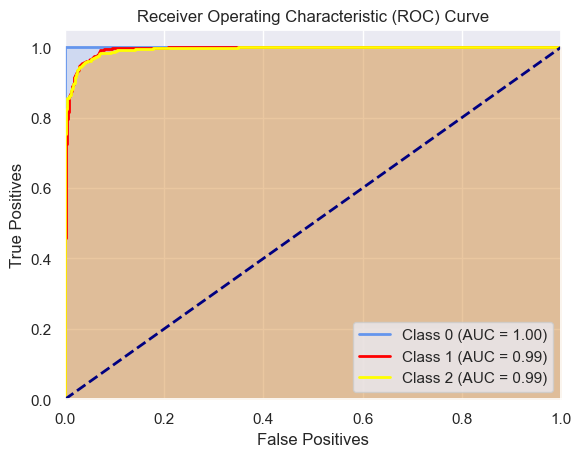

In [145]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['cornflowerblue', 'red', 'yellow']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
    plt.fill_between(fpr[i], tpr[i], alpha=0.2, color=color)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Qualitative Analysis

#### SHAP

In [147]:
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test_scaled)

C:\Users\HP\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\HP\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


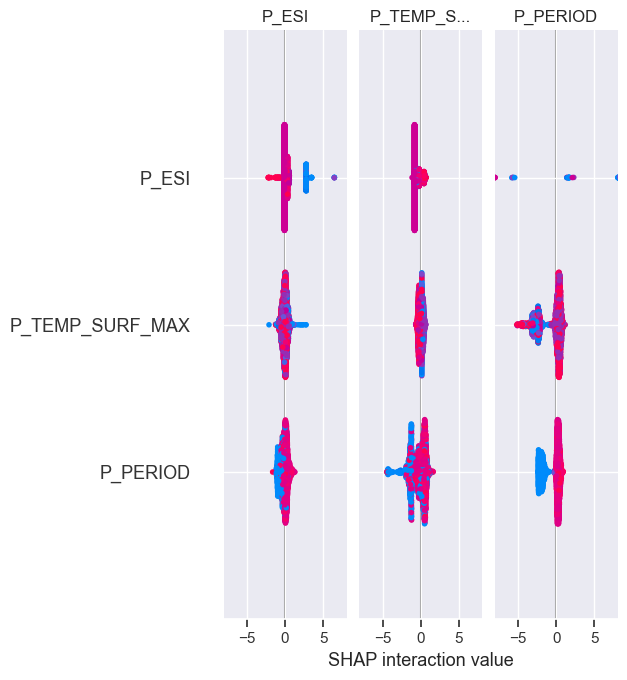

In [148]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

### Feature importance

In [150]:
feature_importances = best_xgb_model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance'])
importance_df['Feature'] = importance_df['Feature'].apply(lambda x: X_train.columns[int(x[1:])])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [151]:
print(importance_df)

            Feature  Importance
2          P_PERIOD   35.207203
6     S_TEMPERATURE   23.566950
12      P_TYPE_TEMP   10.072222
7          S_RADIUS    5.715146
8            S_MASS    3.867526
3          P_RADIUS    3.022836
1   P_TEMP_SURF_MAX    2.403355
0             P_ESI    1.779553
5    P_ECCENTRICITY    1.762819
11            S_DEC    1.329855
10       S_DISTANCE    1.185394
9     S_METALLICITY    1.148611
4            P_MASS    1.104955


## Validating result

### Function to predict habitability

In [371]:
def predict_habitability(input_data):
    input_data_scaled = scaler.transform(input_data)
    prediction = best_xgb_model.predict(input_data_scaled)
    descriptions = [class_description(label) for label in prediction]
    return descriptions

### Defining the class 0,1,2

In [367]:
def class_description(label):
    if label == 0:
        return "Not Habitable"
    elif label == 1:
        return "Potentially Habitable"
    elif label == 2:
        return "Confirmed Habitable"
    else:
        return "Unknown Class"

### Exoplanet data for confirmed habitable

In [369]:
new_exoplanet_data = pd.DataFrame({
    'P_ESI': [0.80235065],
    'P_TEMP_SURF_MAX': [324.9606],
    'P_PERIOD': [17.8719],
    'P_RADIUS': [1.65908],
    'P_MASS': [3.4102945],
    'P_ECCENTRICITY': [0.11],
    'S_TEMPERATURE': [3342],
    'S_RADIUS': [0.31],
    'S_MASS': [0.29],
    'S_METALLICITY': [-0.09],
    'S_DISTANCE': [4.30592],
    'S_DEC': [-12.667687]
})

### Prediction

In [372]:
habitability_prediction = predict_habitability(new_exoplanet_data)
print("Habitability prediction for new exoplanet data:")
for description in habitability_prediction:
    print(description)

Habitability prediction for new exoplanet data:
Confirmed Habitable


# END OF PROJECT -----------------------------------------------------------------------------